In [136]:
# Authors: Lily Picchioni & Andrew Janedy
# March 2025

# Problem Statement: Diabetes in the United States. What living conditions and geographical areas within the United States can lead to an increased risk
# of diabetes?

# Background: Diabetes is a growing conern within The United States, with 37.3 million people currently diagnosed, rates of diagnosed cases of
# diabetes has risen dramatically over the last 20 years. The disease can cause life threatening symptoms and can disrupt an individual's quality of life. 
# Our project has the potential to contribute to the public domain by identifying possible causes of the increase of diabetes in The United States. We
# have combined multiple data sets in an attempt to find potential patterns, including data on diabetes, obesity, poverty and food security in the US.
# Identifying potential relationships between these data sets is the first step in reducing the prevalence of this life threatening disease in the United
# States. If we can draw significant parallels between an individuals ability to obtain quality, healthy foods, and the prevalence of conditions such as 
# obesity and diabetes, this data can be used to assist regions more likely to be impacted by these ailments.

# Relevant data frames:
# - diabetes_data: An entry for each state representing the rate of diabetes for every year between 2000-2022
# --- Index: 'State' (The unique state name and D.C.)
# --- Columns: XXXX (where XXXX represents the numerical year)
# --- Values: 'Total - Percentage' (The % rate of diabetes per capita for the given year)


In [217]:
# IMPORTS

import matplotlib
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [218]:
# # npdf = pd.read_csv("Book 1.csv", index_col=0)

# # # Drop rows that contain ANY NaN values
# # npdf.dropna(inplace=True)

# # # Remove '%' from the last column and convert to float
# # last_col = npdf.columns[-1]
# # npdf[last_col] = npdf[last_col].str.rstrip('%').astype(float)



# # npdf.head()

# import pandas as pd

# # Load the CSV with 'State' as the index column
# df = pd.read_csv("Book 1.csv", index_col=0)

# # Drop the row that contains 'State' as a label (if it's included in your data)
# df = df.drop(index='State')

# # Drop rows with any NaN values
# df = df.dropna()

# # Identify the last column (this is where the '%' sign is)
# last_col = df.columns[-1]

# # Remove '%' from the last column and convert to float
# df[last_col] = df[last_col].str.replace('%', '', regex=False).astype(float)

# # Convert all other columns to float (in case they're still strings)
# for col in df.columns:
#     if col != last_col:  # Skip the last column
#         df[col] = df[col].astype(float)

# # Optional: save the cleaned DataFrame to a Parquet file
# df.to_parquet("cleaned_poverty_data.parquet")

# df.index.name = "State"  # This sets the index name so "State" shows as a label

# # Optional: preview the cleaned DataFrame
# df.head()


In [219]:
import pandas as pd

file_paths = [    
    "data_frames/diabetes_data.parquet",
    "data_frames/obesity_data.parquet",
    "data_frames/poverty_data.parquet",
    "data_frames/food_security_data.parquet",
]

for path in file_paths:
    df = pd.read_parquet(path)

    # If 'State' is the index, normalize it directly
    df.index = df.index.to_series().replace({
        "DC": "Washington, D.C.",
        "District of Columbia": "Washington, D.C."
    })

    # Save it back with the index (default behavior)
    df.to_parquet(path)
    print(f"Normalized index and saved: {path}")


Normalized index and saved: data_frames/diabetes_data.parquet
Normalized index and saved: data_frames/obesity_data.parquet
Normalized index and saved: data_frames/poverty_data.parquet
Normalized index and saved: data_frames/food_security_data.parquet


In [220]:
# DATA FRAMES

diabetes_data, obesity_data, poverty_data, food_security_data = [    
    pd.read_parquet("data_frames/diabetes_data.parquet"),
    pd.read_parquet("data_frames/obesity_data.parquet"),
    pd.read_parquet("data_frames/poverty_data.parquet"),
    pd.read_parquet("data_frames/food_security_data.parquet"),
]
    


In [221]:
print(f"diabetes_data contains {len(diabetes_data)} rows of data")
print(f"obesity_data contains {len(obesity_data)} rows of data")
print(f"poverty_data contains {len(poverty_data)} rows of data")
print(f"food_security_data contains {len(food_security_data)} rows of data")

diabetes_data contains 51 rows of data
obesity_data contains 51 rows of data
poverty_data contains 52 rows of data
food_security_data contains 650810 rows of data


In [222]:
diabetes_data.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,7.3,9.4,8.4,8.4,7.9,9.3,9.5,9.8,10.6,10.9,...,12.7,11.8,12.0,13.2,12.5,12.7,12.2,12.9,13.3,13.4
Alaska,5.9,6.1,6.4,6.1,6.5,5.6,7.0,6.5,7.3,6.5,...,7.3,7.6,7.8,7.7,7.7,8.7,7.2,7.4,8.0,8.3
Arizona,5.9,6.1,6.4,6.1,6.5,7.3,8.3,8.2,7.6,8.2,...,9.8,9.1,9.1,9.7,9.4,9.6,9.8,9.7,9.7,11.3
Arkansas,5.9,7.3,7.5,7.0,6.7,7.7,7.7,8.8,8.9,9.5,...,10.5,11.5,11.2,12.1,10.8,12.4,12.1,11.7,10.8,13.9
California,7.1,6.6,8.0,7.5,7.5,7.4,8.5,7.8,8.7,9.2,...,9.9,9.9,9.6,9.7,9.8,9.7,9.4,9.2,10.9,10.6


In [223]:
obesity_data.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,24.5,25.2,25.9,26.6,27.2,27.9,28.6,29.3,29.9,30.6,...,32.4,33.5,35.6,35.7,36.3,36.2,36.1,39.0,39.9,38.3
Alaska,21.6,22.1,22.6,23.2,23.7,24.2,24.8,25.3,25.8,26.3,...,28.4,29.7,29.8,31.4,34.2,29.5,30.5,31.9,33.5,32.1
Arizona,18.7,19.3,19.9,20.6,21.2,21.9,22.5,23.1,23.8,24.4,...,26.8,28.9,28.4,29.0,29.5,29.5,31.4,30.9,31.3,33.2
Arkansas,27.8,28.3,28.8,29.2,29.7,30.2,30.7,31.1,31.6,32.1,...,34.6,35.9,34.5,35.7,35.0,37.1,37.4,36.4,38.7,37.4
California,18.5,19.0,19.4,19.9,20.3,20.7,21.2,21.6,22.1,22.5,...,24.1,24.7,24.2,25.0,25.1,25.8,26.2,30.3,27.6,28.1


In [224]:
poverty_data.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,15.5,15.5,15.5,14.7,16.0,16.9,16.6,16.9,15.7,16.6,...,17.3,17.3,18.5,18.5,18.5,18.5,12.9,14.9,15.9,15.9
Alaska,9.2,9.2,9.2,9.2,9.4,10.8,10.9,8.9,8.4,11.7,...,12.4,12.4,10.3,10.3,10.3,10.3,10.2,13.3,11.4,11.4
Arizona,13.8,13.8,13.8,13.5,13.9,14.4,14.2,14.2,14.7,21.2,...,18.6,18.6,17.4,17.4,17.4,17.4,9.9,10.8,12.6,12.6
Arkansas,17.6,17.6,17.6,18.8,16.4,17.2,17.3,17.9,17.3,18.9,...,15.5,15.5,19.1,19.1,19.1,19.1,14.1,14.2,16.8,16.8
California,13.2,13.2,13.2,13.1,13.2,13.3,13.1,12.4,13.3,15.3,...,16.3,16.3,15.3,15.3,15.3,15.3,10.1,11.0,11.9,11.9


In [210]:
poverty_data = poverty_data.iloc[:, :-1]
poverty_data.head()

,2019,2020,2021
State,,,
New Hampshire,3.7,6.2,6.9
Delaware,6.5,10.5,11.7
Oklahoma,10.8,15.5,15.1
Idaho,7.1,9.2,9.3
Missouri,9.4,10.6,12.3


In [211]:
combined = pd.concat([df, poverty_data], axis=1).sort_index()
combined.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2015,2019,2020,2021
State,,,,,,,,,,,,,
Alabama,15.5,14.7,16.0,16.9,16.6,16.9,15.7,16.6,17.3,18.5,12.9,14.9,15.9
Alaska,9.2,9.2,9.4,10.8,10.9,8.9,8.4,11.7,12.4,10.3,10.2,13.3,11.4
Arizona,13.8,13.5,13.9,14.4,14.2,14.2,14.7,21.2,18.6,17.4,9.9,10.8,12.6
Arkansas,17.6,18.8,16.4,17.2,17.3,17.9,17.3,18.9,15.5,19.1,14.1,14.2,16.8
California,13.2,13.1,13.2,13.3,13.1,12.4,13.3,15.3,16.3,15.3,10.1,11.0,11.9


In [214]:
all_years = [str(y) for y in range(2000, 2023)]
for year in all_years:
    if year not in combined.columns:
        combined[year] = pd.NA  # Add missing year columns

combined = combined[sorted(combined.columns.astype(int).astype(str))]

combined = combined.sort_index()  # optional: sort states alphabetically
combined = combined.apply(pd.to_numeric, errors='coerce')  # ensure numbers
combined = combined.ffill(axis=1).bfill(axis=1)  # fill missing left-to-right and right-to-left

combined.head()

combined.to_parquet("data_frames/poverty_data.parquet")

In [198]:
food_security_data.head()

,ID,Year,Home Owned/Rent/Other,Housing Type,Household Income,Household Size,Region,Division,State Abbreviation,Sex,...,Food Security 8,Food Security 9,Food Security 10,Food Security 12,Food Security 13,Food Security 14,Food Security 15,Food Security 16,Food Security Status,Child Food Security Status
0,581125017600866,2019,1,1,14,4,4,9,NaN,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
1,581125017600866,2019,1,1,14,4,4,9,NaN,2,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
2,581125017600866,2019,1,1,14,4,4,9,NaN,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
3,581125017600866,2019,1,1,14,4,4,9,NaN,2,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1
4,809001585510960,2019,2,1,13,3,3,7,NaN,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1


In [132]:
# Create output folder if it doesn't exist
output_folder = "state_diabetes_graphs"
os.makedirs(output_folder, exist_ok=True)

# Find the global min and max values for the y-axis (diabetes data)
global_min = diabetes_data.min().min()  # Minimum value across all states
global_max = diabetes_data.max().max()  # Maximum value across all states

# Loop through each state and create an individual plot
for state in diabetes_data.index:
    plt.figure(figsize=(8, 4))
    plt.plot(diabetes_data.columns, diabetes_data.loc[state], marker='o', linestyle='-')
    
    # Add labels, title, and adjust x-axis labels for readability
    plt.xlabel('Year')
    plt.ylabel('Total - Percentage')
    plt.title(f'Diabetes Total - Percentage in {state} (2000 - 2022)')
    plt.xticks(rotation=45)
    
    # Set the same y-axis limits for all graphs
    plt.ylim(global_min, global_max)
    
    plt.tight_layout()
    
    # Save each plot as a PNG file
    output_path = os.path.join(output_folder, f"{state.replace(' ', '_')}_diabetes_graph.png")
    plt.savefig(output_path)
    plt.close()

print(f'Graphs have been saved to the folder: {output_folder}')


Graphs have been saved to the folder: state_diabetes_graphs


In [133]:
# Assuming obesity_data is already loaded and available as a DataFrame
output_folder = 'state_obesity_graphs'
os.makedirs(output_folder, exist_ok=True)

# Find the global min and max values for the y-axis
global_min = obesity_data.min().min()  # Minimum value across all states
global_max = obesity_data.max().max()  # Maximum value across all states

# Loop through each state and generate its own graph
for state in obesity_data.index:
    plt.figure(figsize=(10, 6))  # Set a size for the individual plot
    plt.plot(obesity_data.columns, obesity_data.loc[state], label=state)
    
    # Add labels and title for each state
    plt.xlabel('Year')
    plt.ylabel('Total - Percentage')
    plt.title(f'Obesity Total - Percentage in {state} 2011 - 2022')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Set the same y-axis limits for all graphs
    plt.ylim(global_min, global_max)
    
    # Save the plot as a .png file in the output folder
    output_path = os.path.join(output_folder, f'{state.replace(' ', '_')}_obesity_graph.png')
    plt.savefig(output_path)

    # Close the figure to free memory before the next one
    plt.close()

print(f'Graphs have been saved to the folder: {output_folder}')


Graphs have been saved to the folder: state_obesity_graphs


In [134]:
# Create line graph for each state representing the known poverty data

# Create output folder if it doesn't exist
output_folder = "state_poverty_graphs"
os.makedirs(output_folder, exist_ok=True)

# Exclude the last column
columns_to_plot = poverty_data.columns[:-1]

# Find the global min and max values for the y-axis (based on selected columns)
global_min = poverty_data[columns_to_plot].min().min()
global_max = poverty_data[columns_to_plot].max().max()

# Loop through each state and create an individual plot
for state in poverty_data.index:
    plt.figure(figsize=(8, 4))
    plt.plot(columns_to_plot, poverty_data.loc[state, columns_to_plot], marker='o', linestyle='-')
    
    # Add labels, title, and adjust x-axis labels for readability
    plt.xlabel('Year')
    plt.ylabel('Total - Percentage')
    plt.title(f'Poverty Total - Percentage in {state} (2000 - 2022)')
    plt.xticks(rotation=45)
    
    # Set the same y-axis limits for all graphs
    plt.ylim(global_min, global_max)
    
    plt.tight_layout()
    
    # Save each plot as a PNG file
    output_path = os.path.join(output_folder, f"{state.replace(' ', '_')}_poverty_graph.png")
    plt.savefig(output_path)
    plt.close()

print(f'Graphs have been saved to the folder: {output_folder}')


Graphs have been saved to the folder: state_poverty_graphs



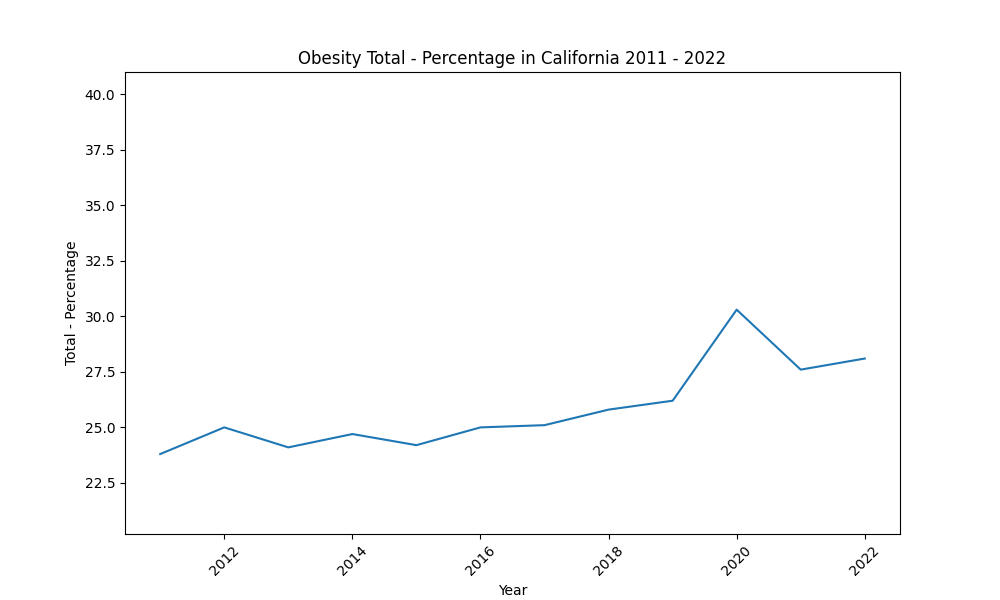
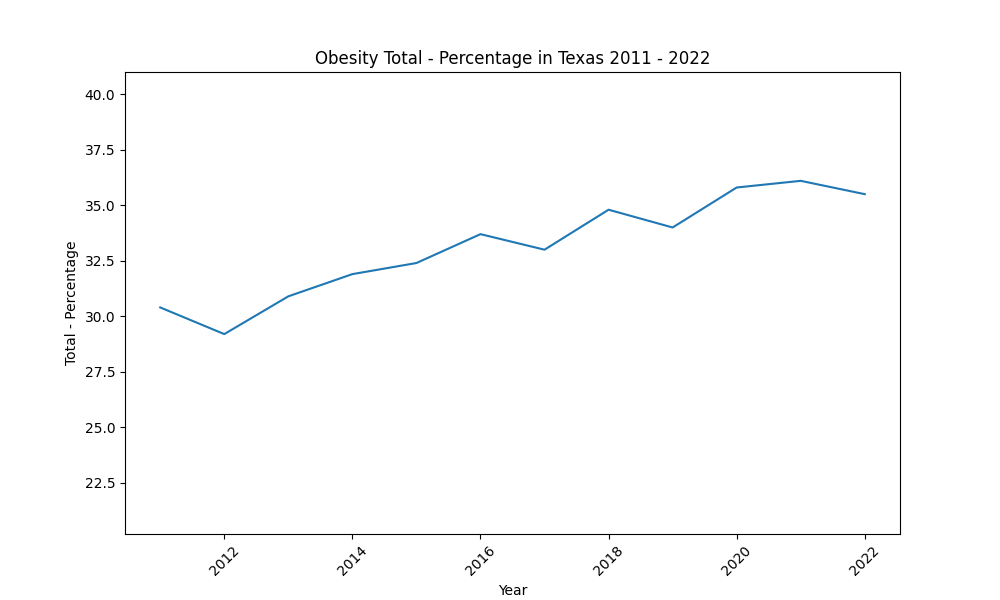
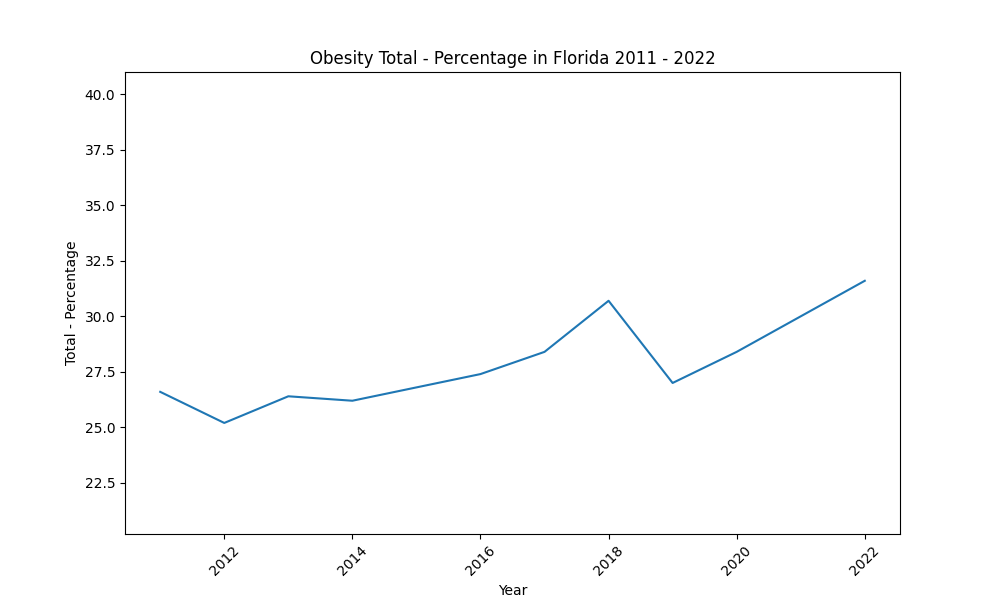
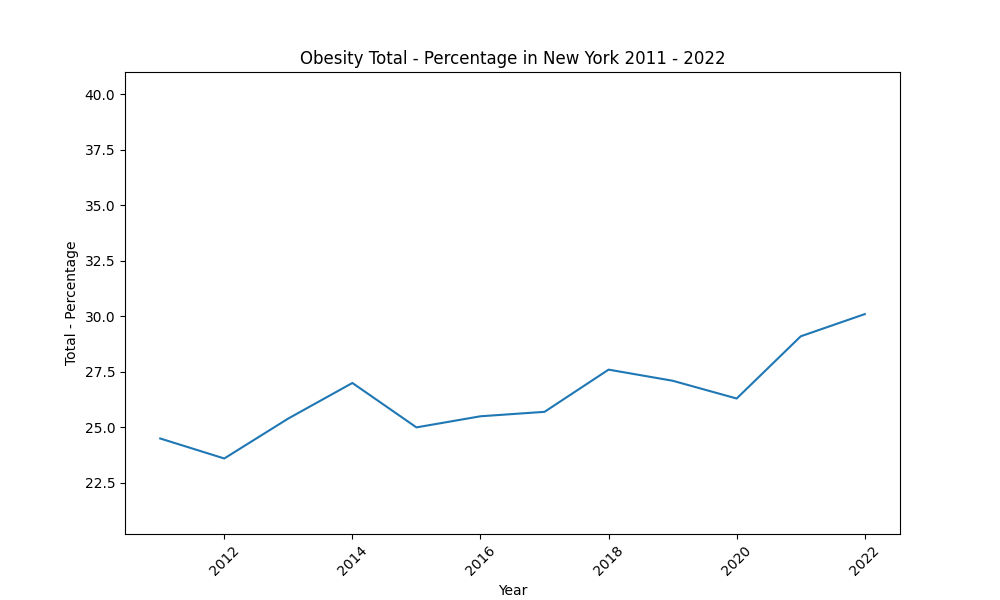
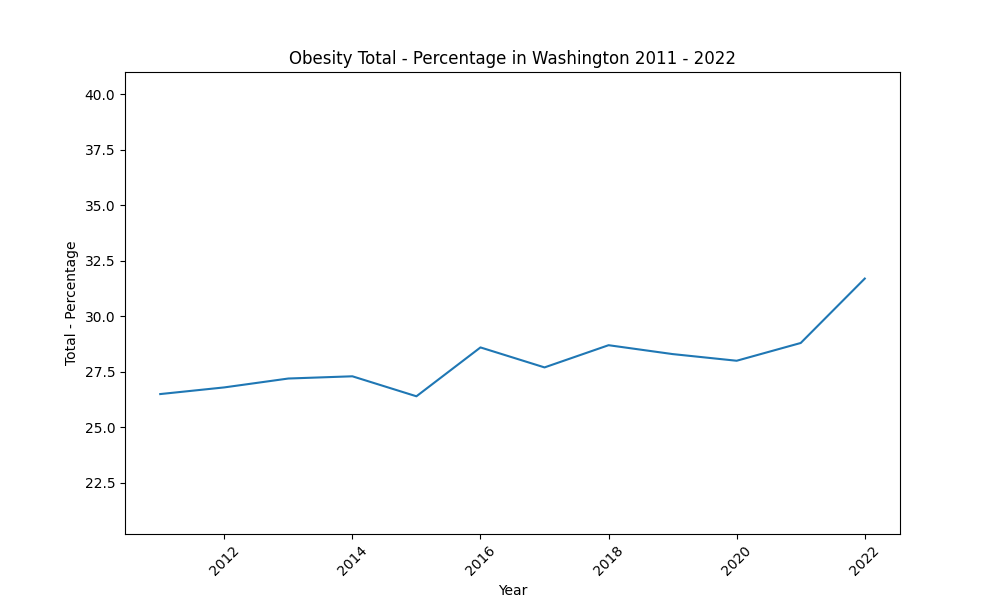
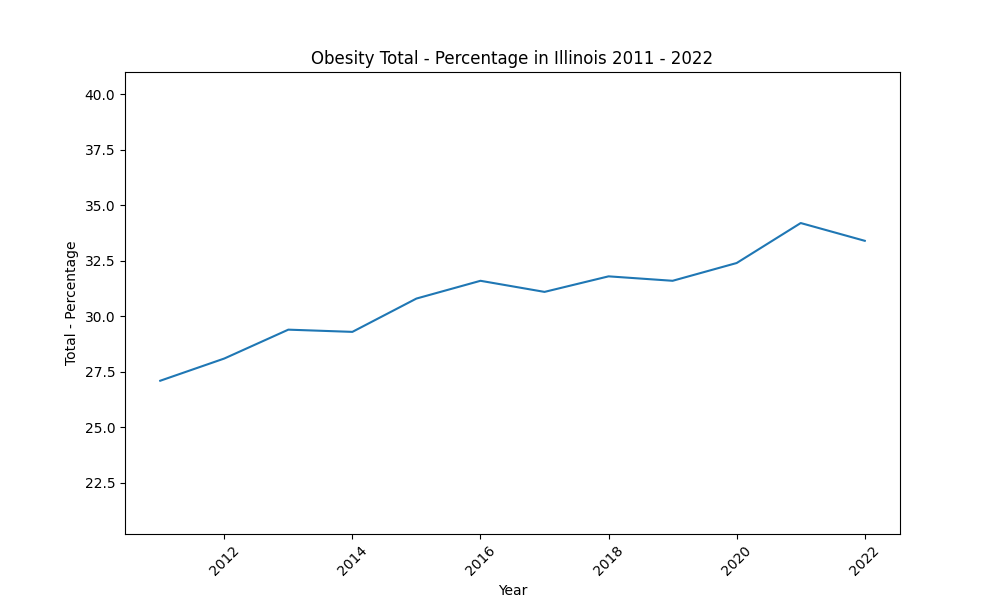
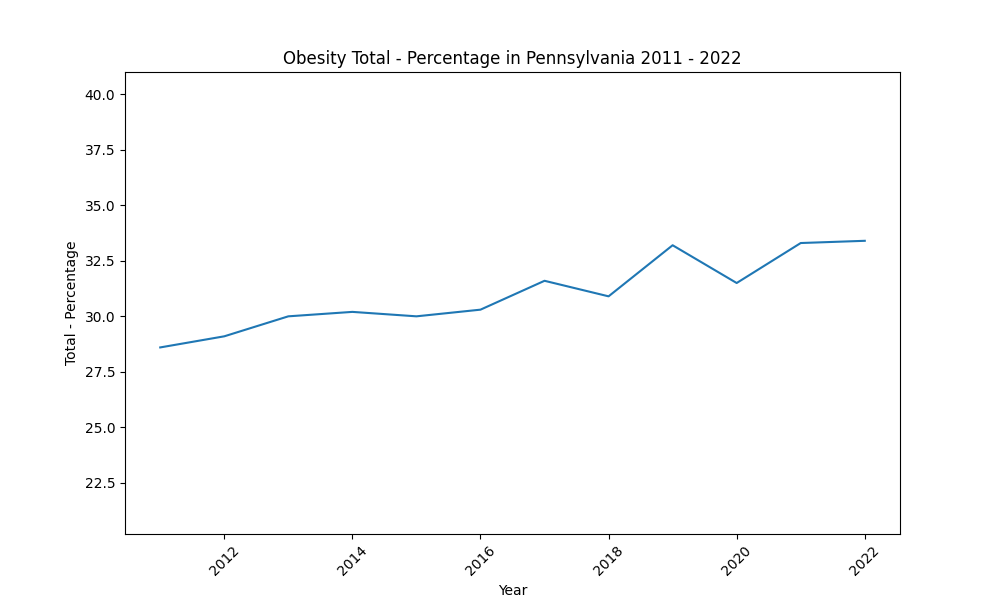
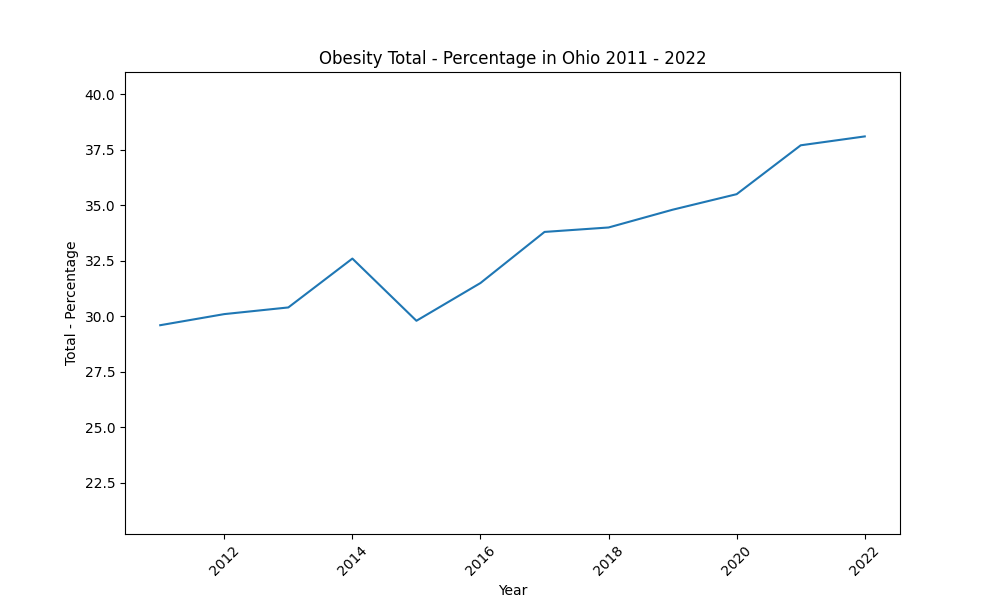
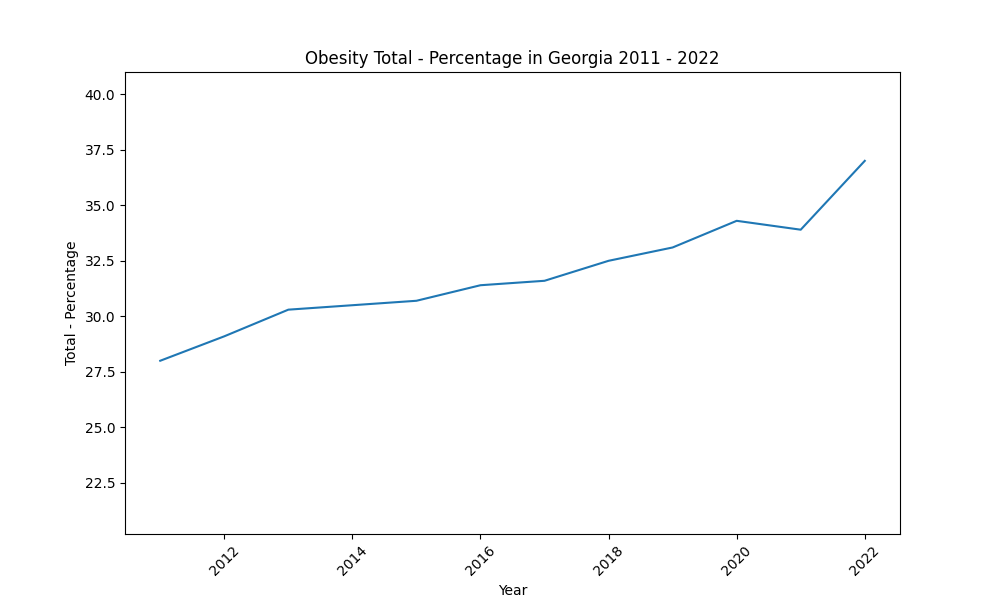
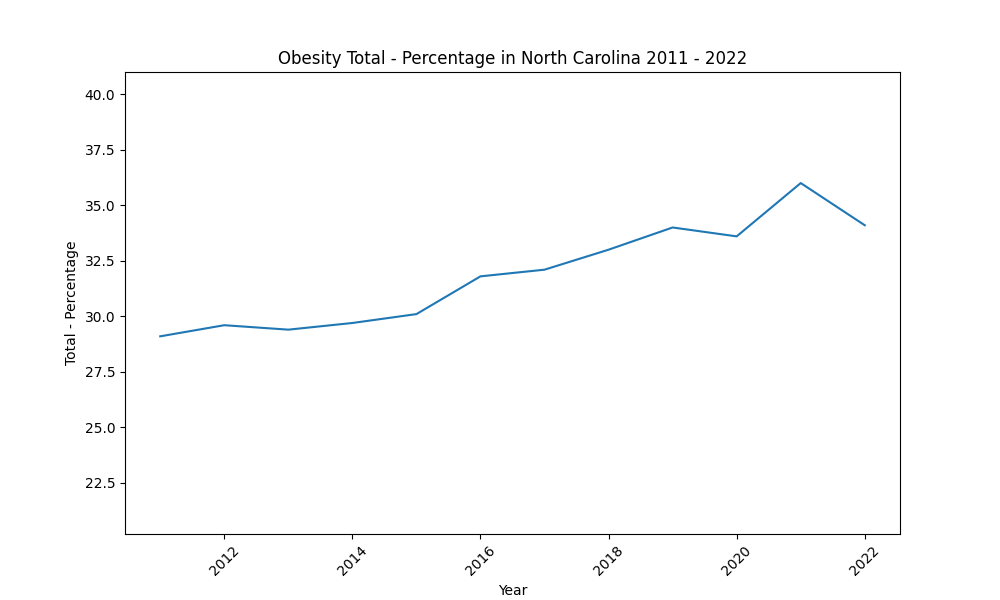
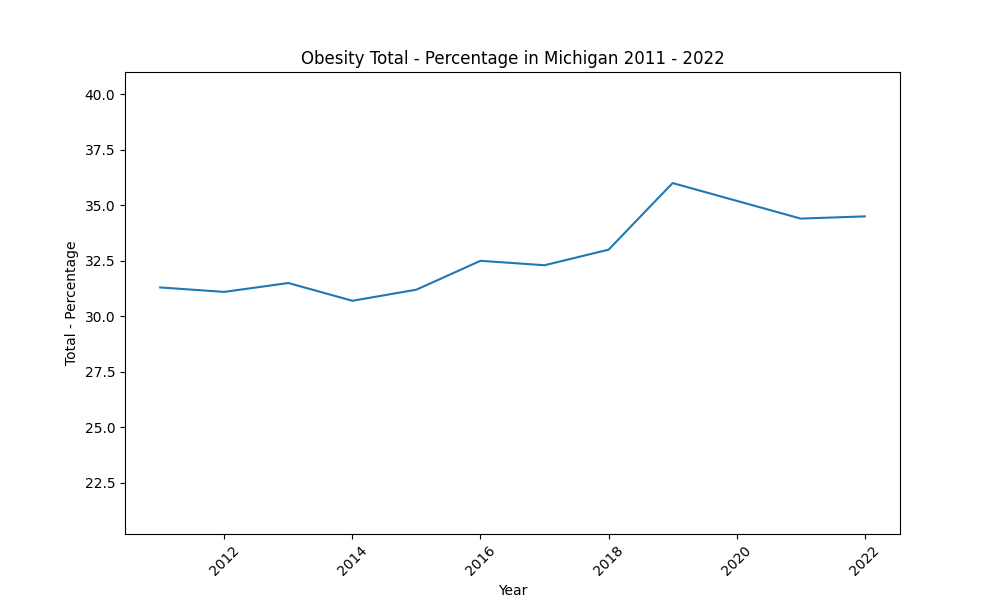
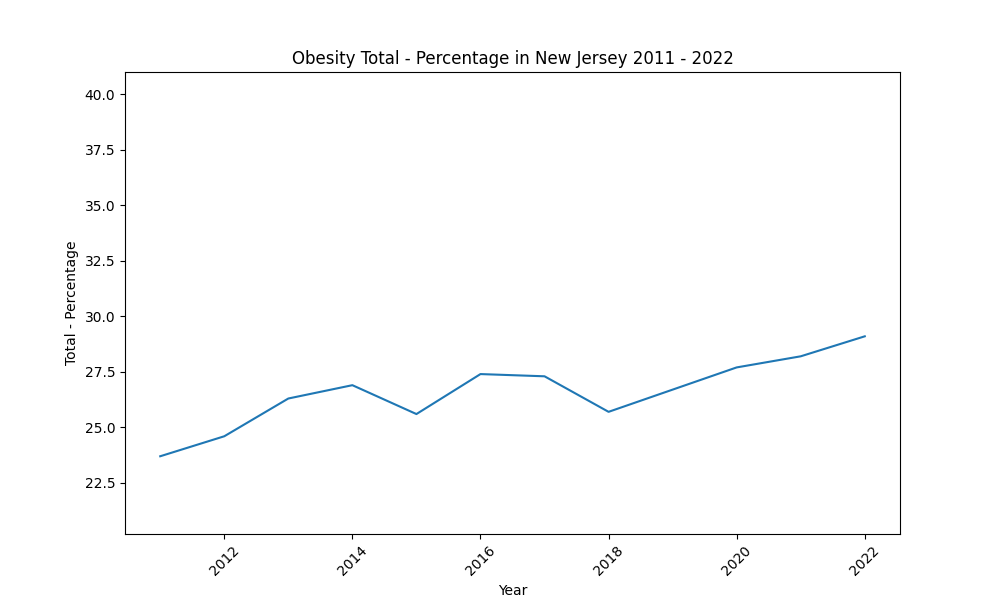
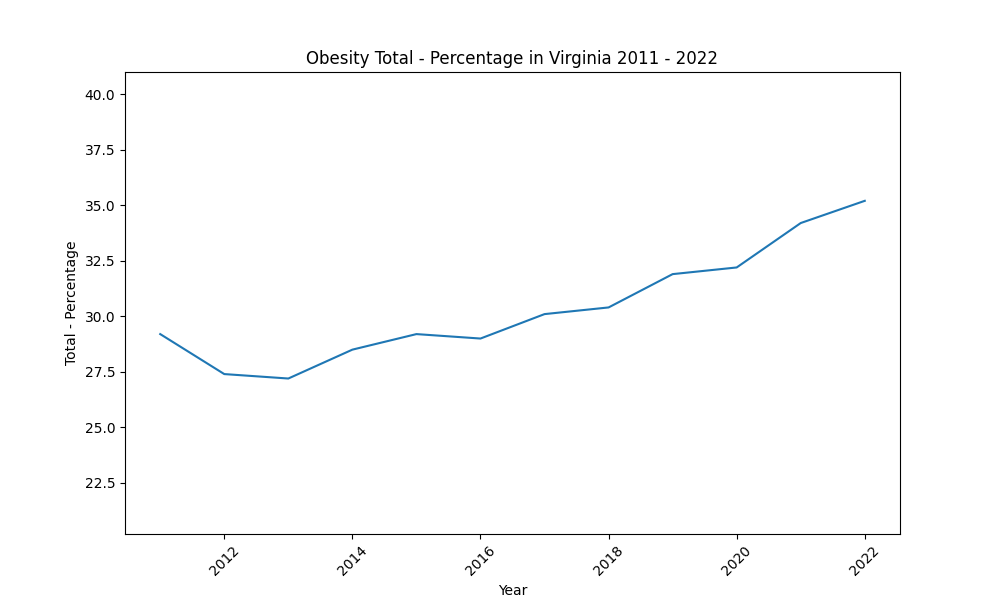
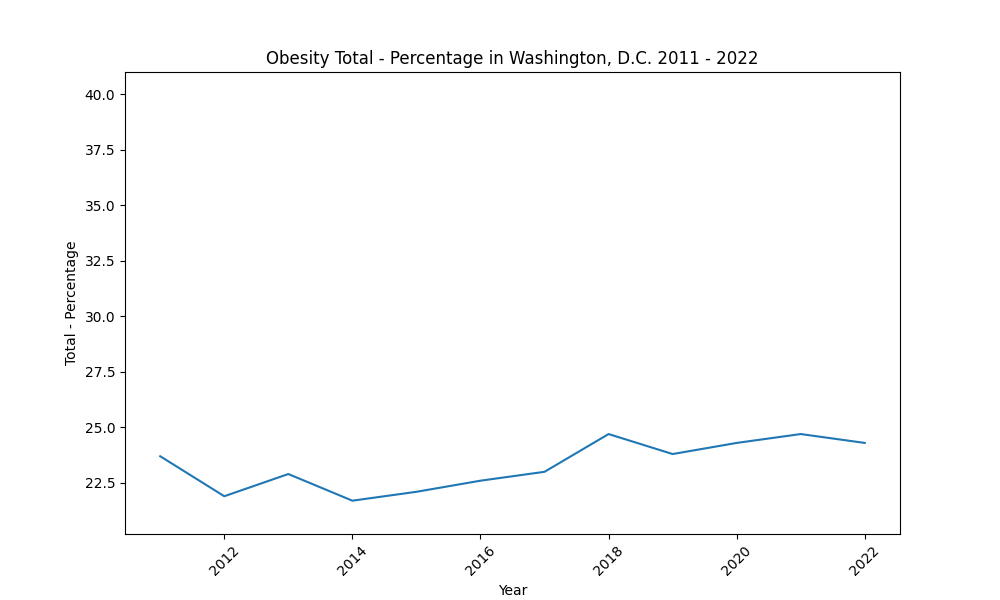
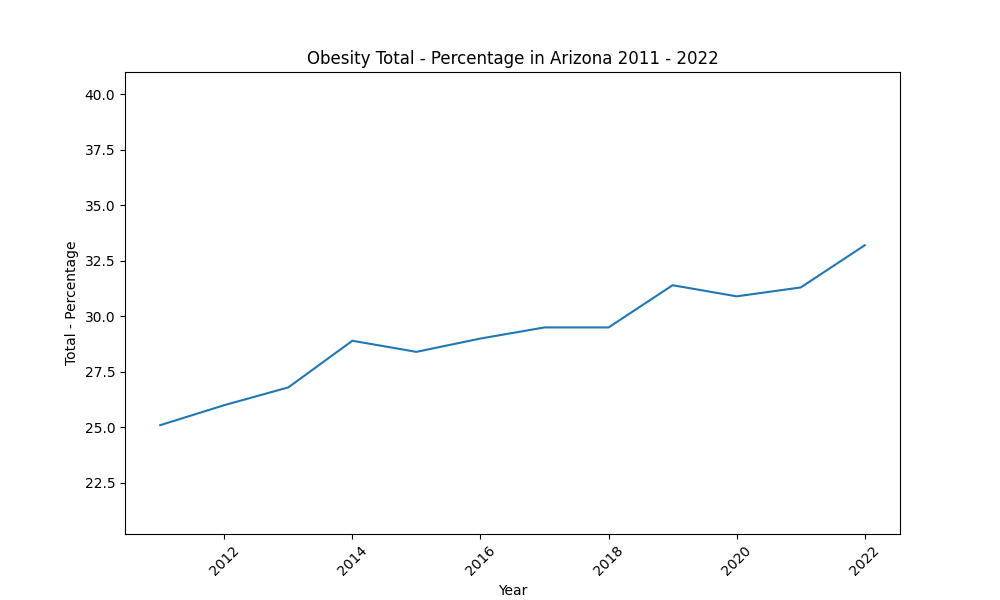
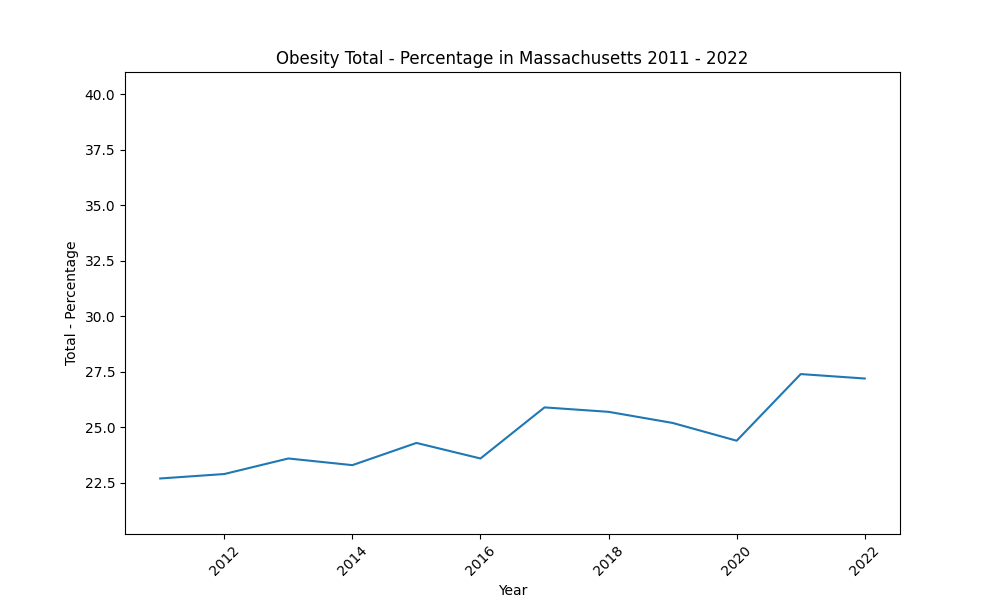
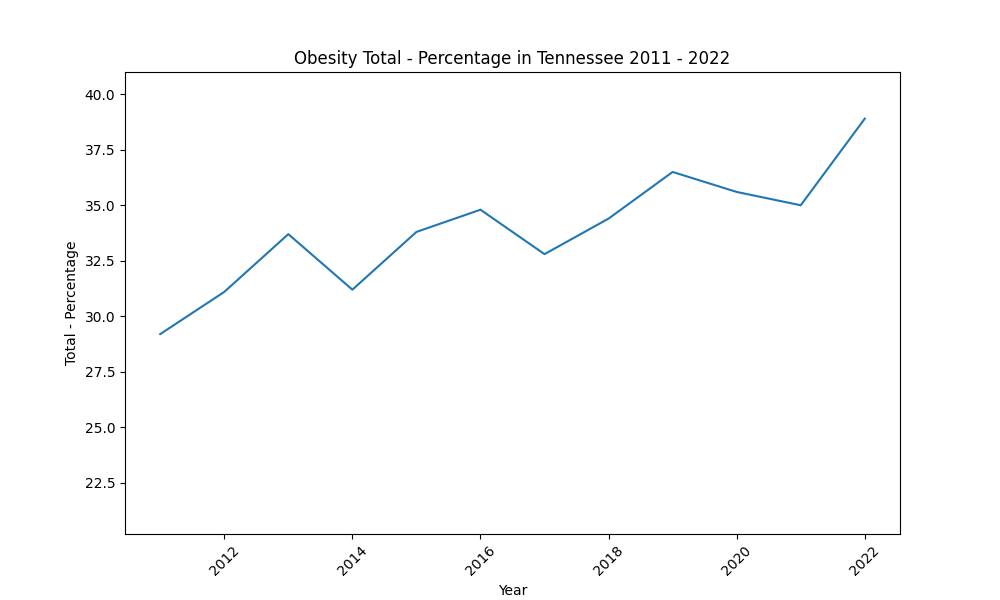
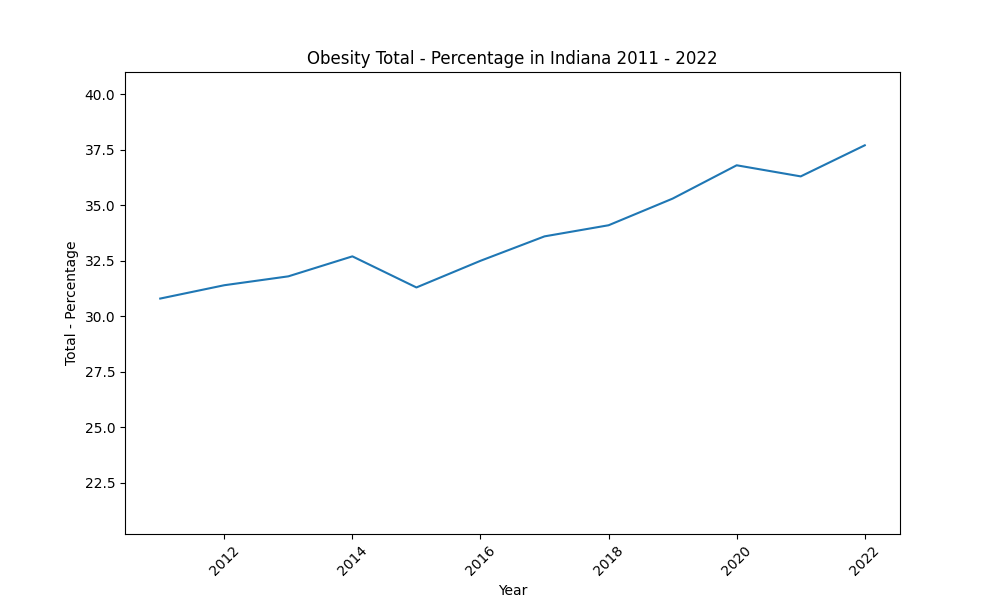
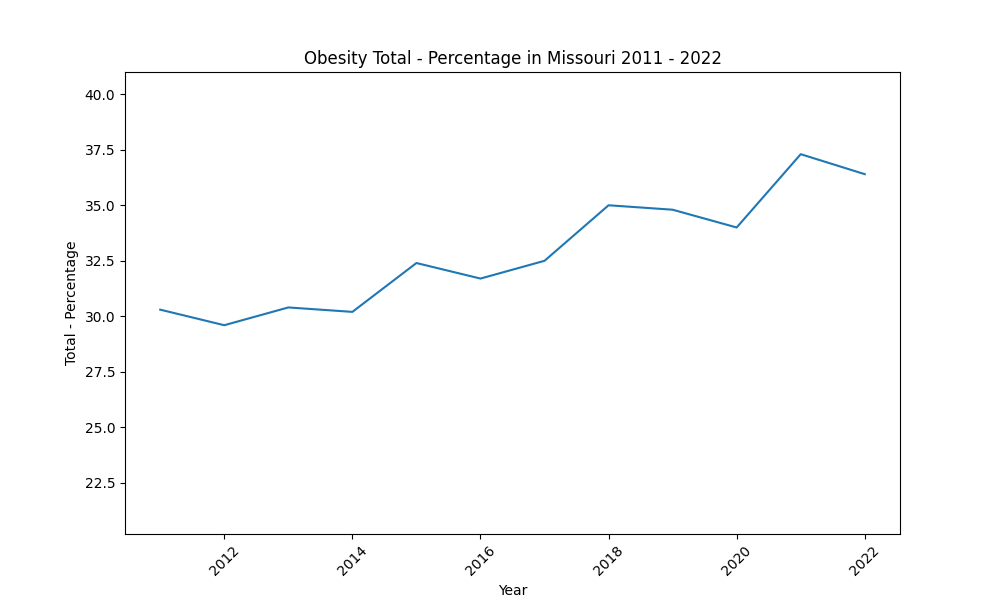
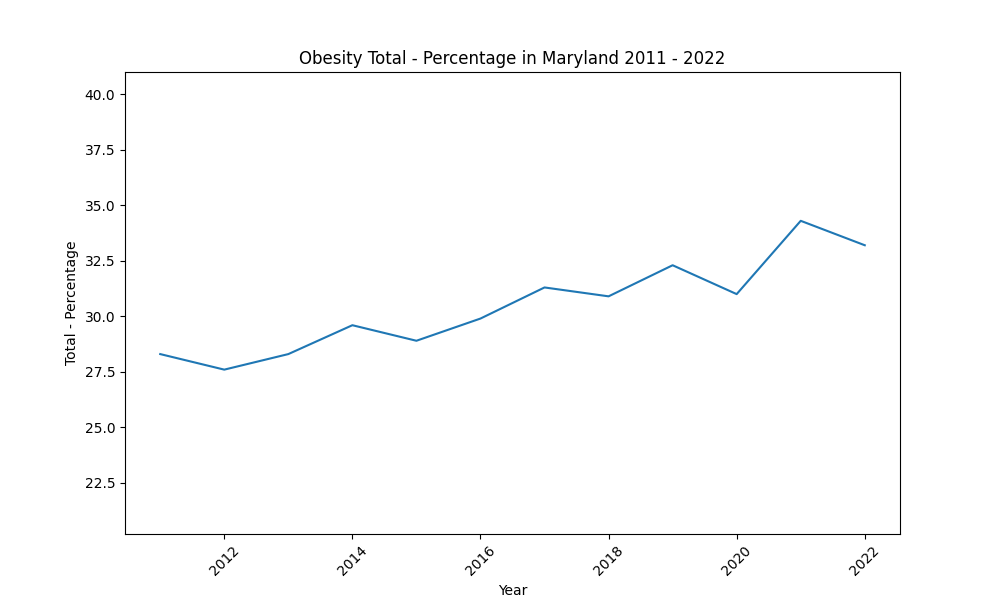
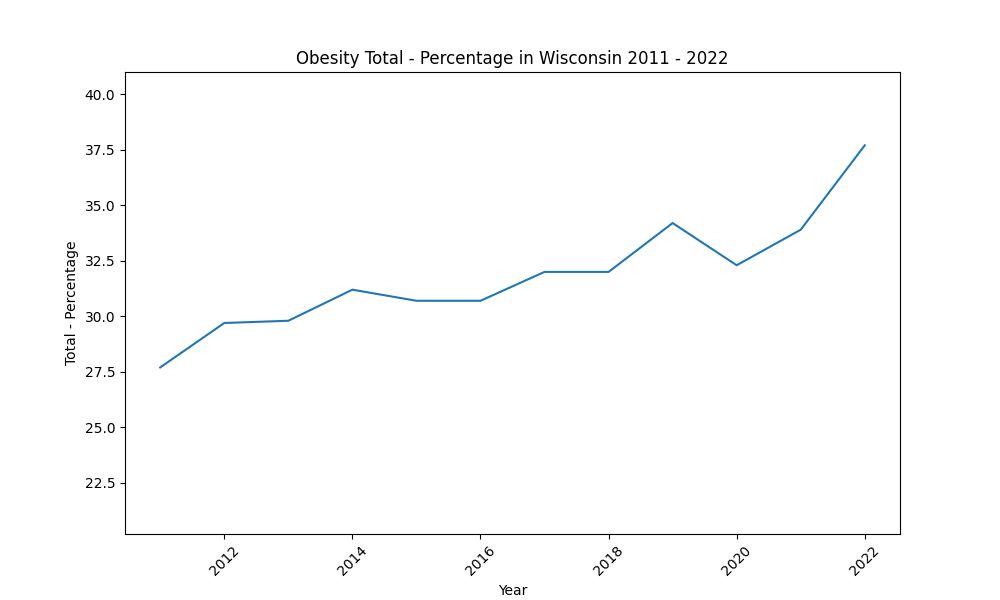
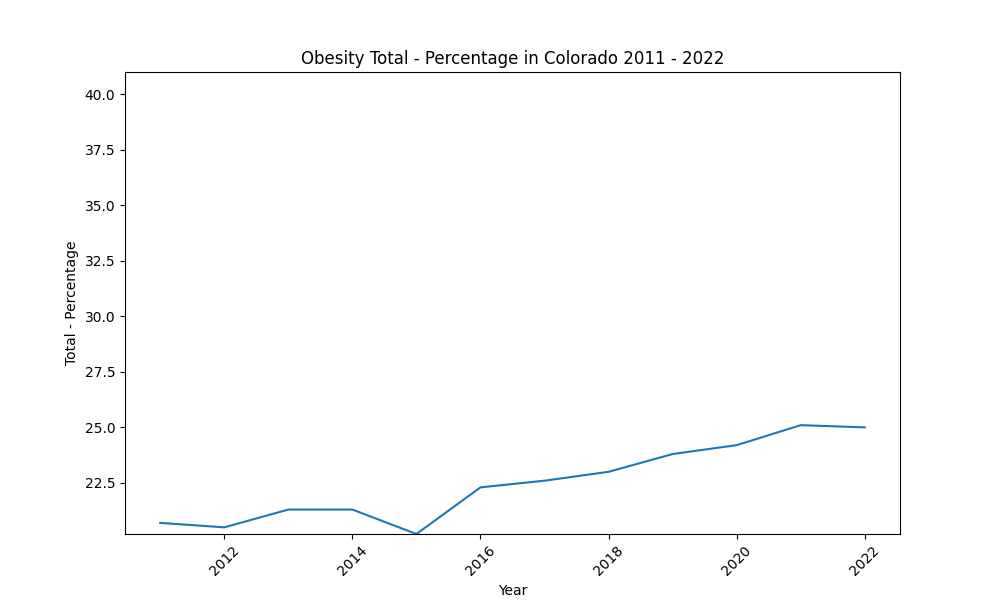
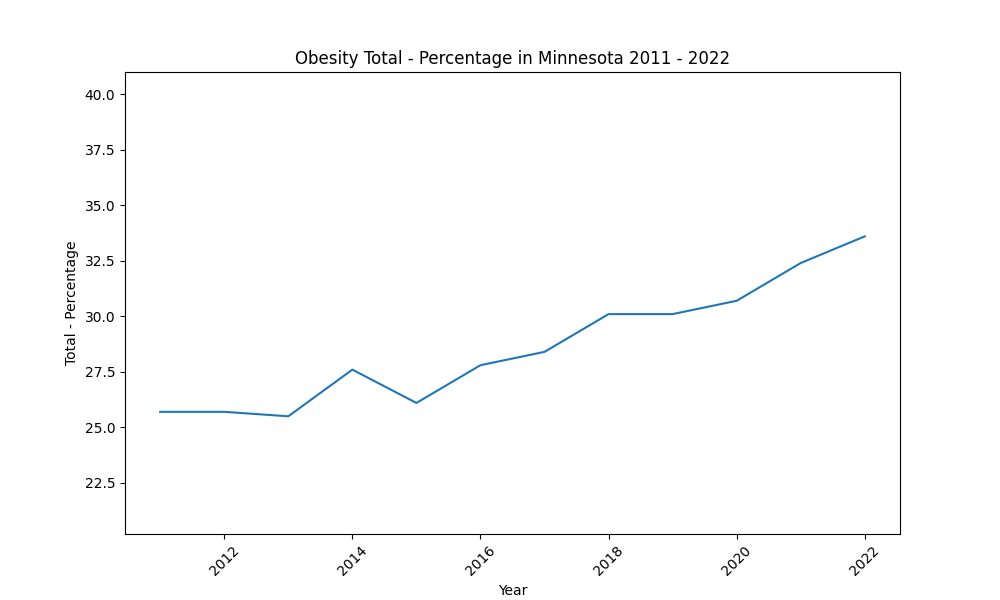
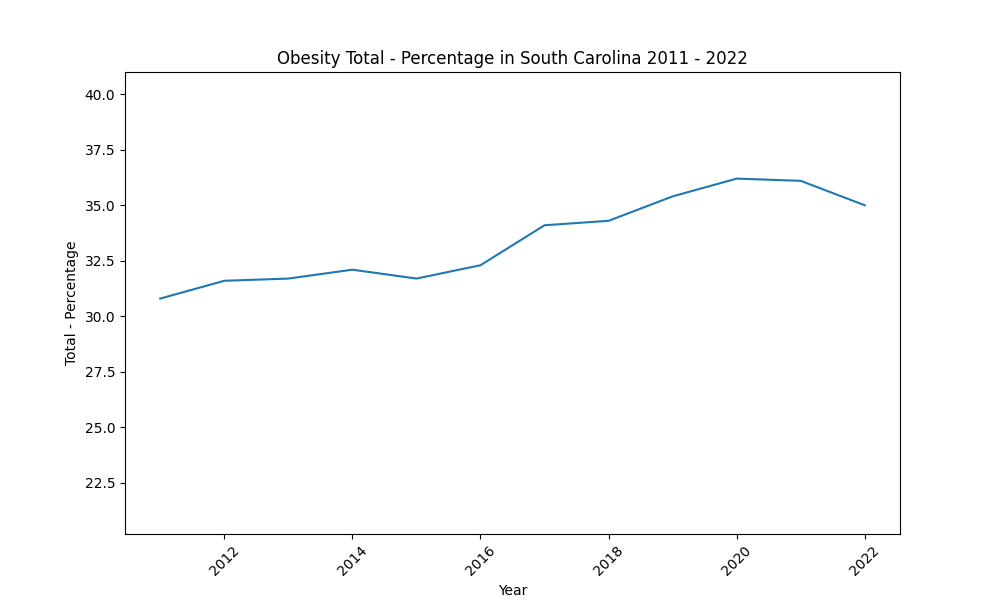
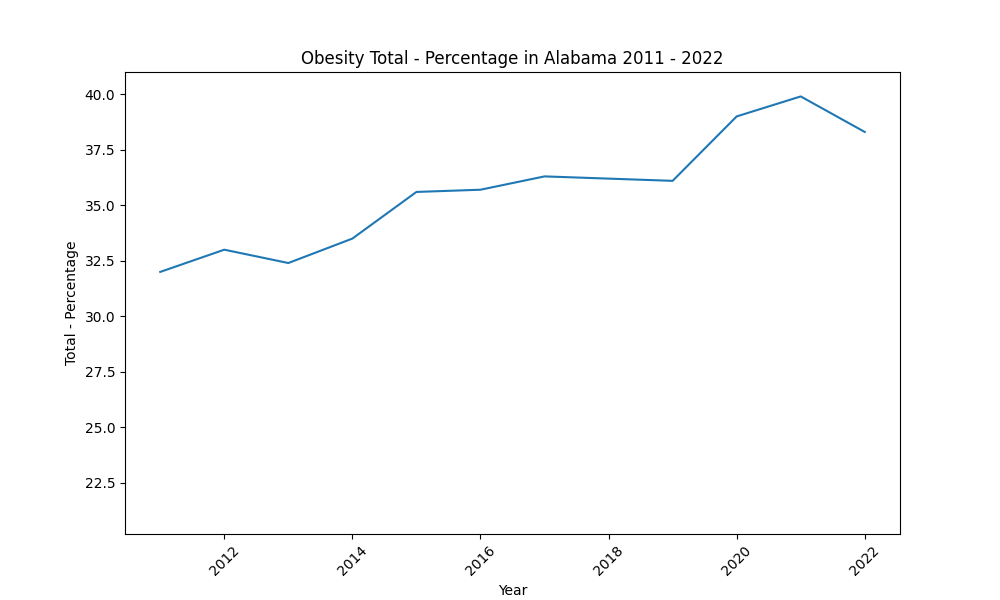
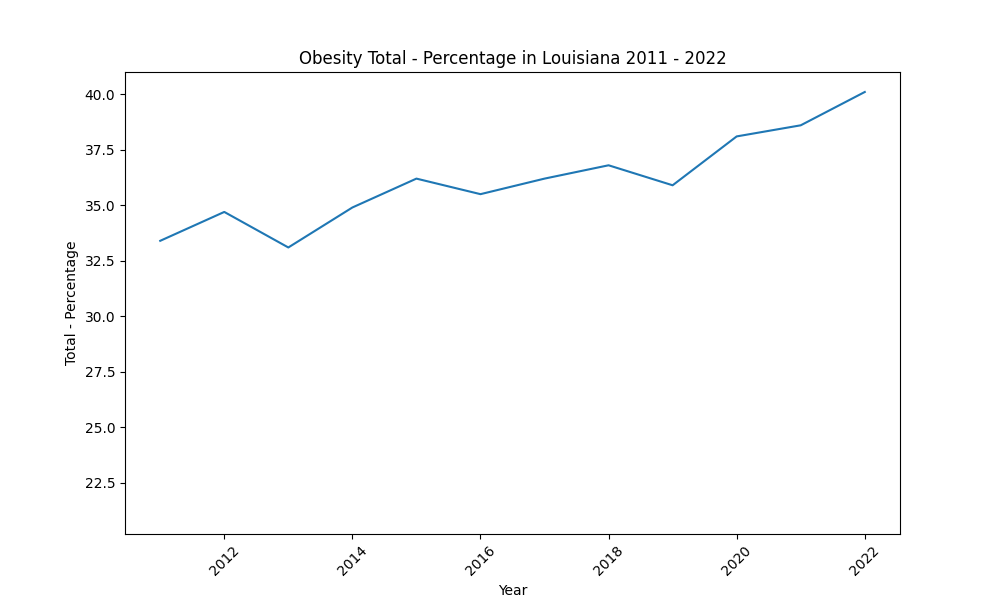
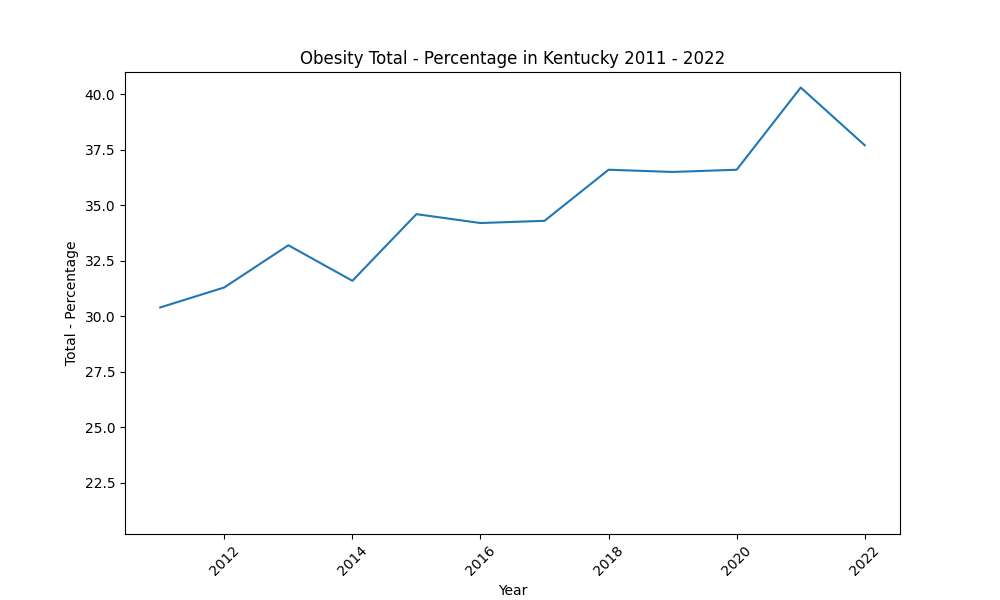
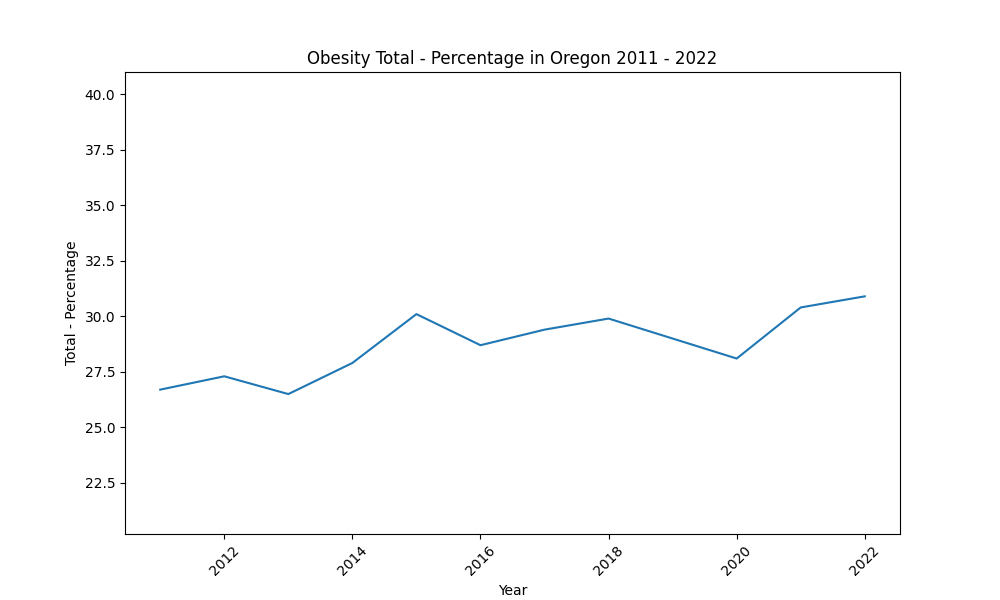
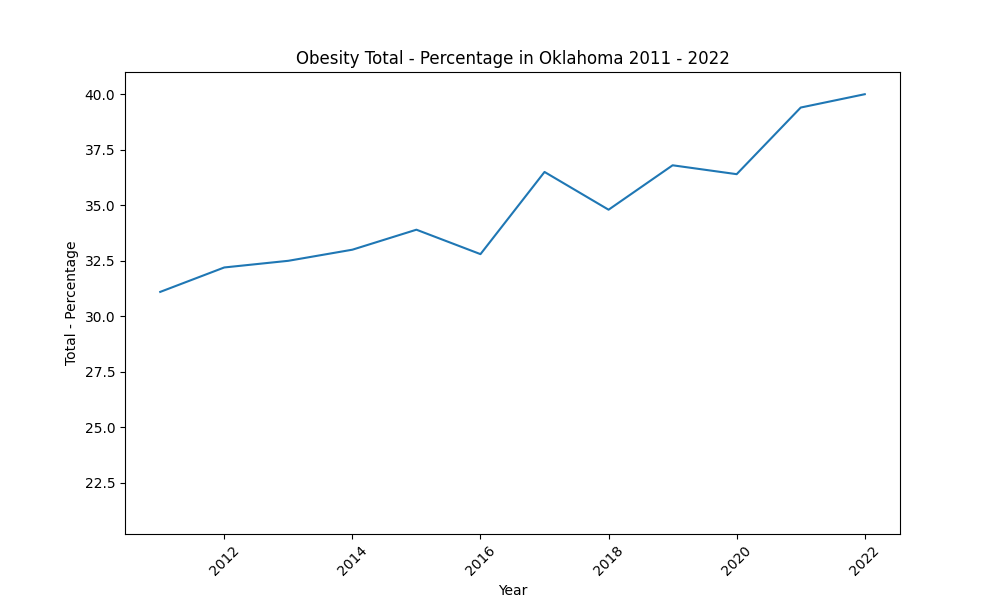
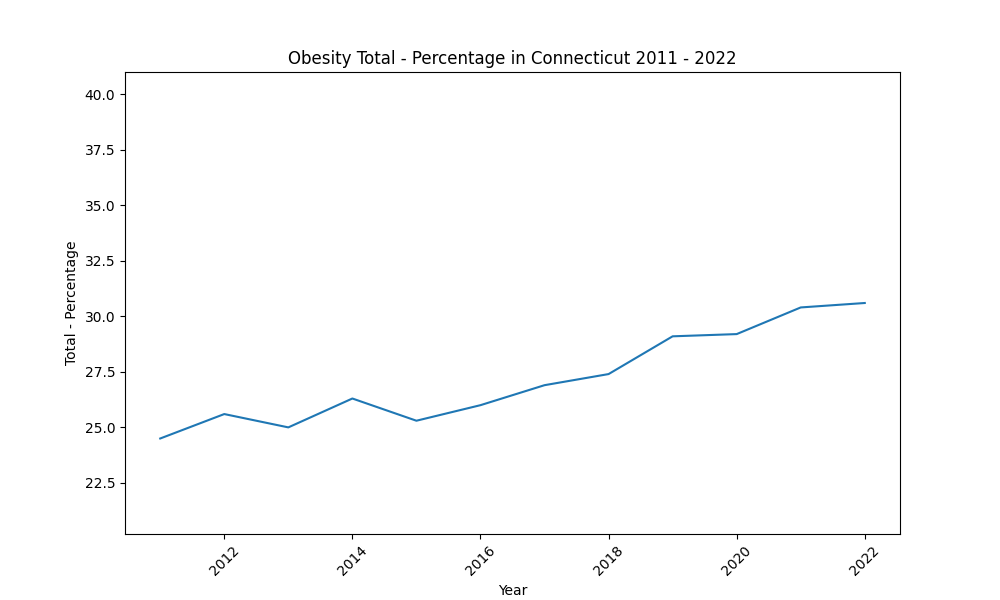
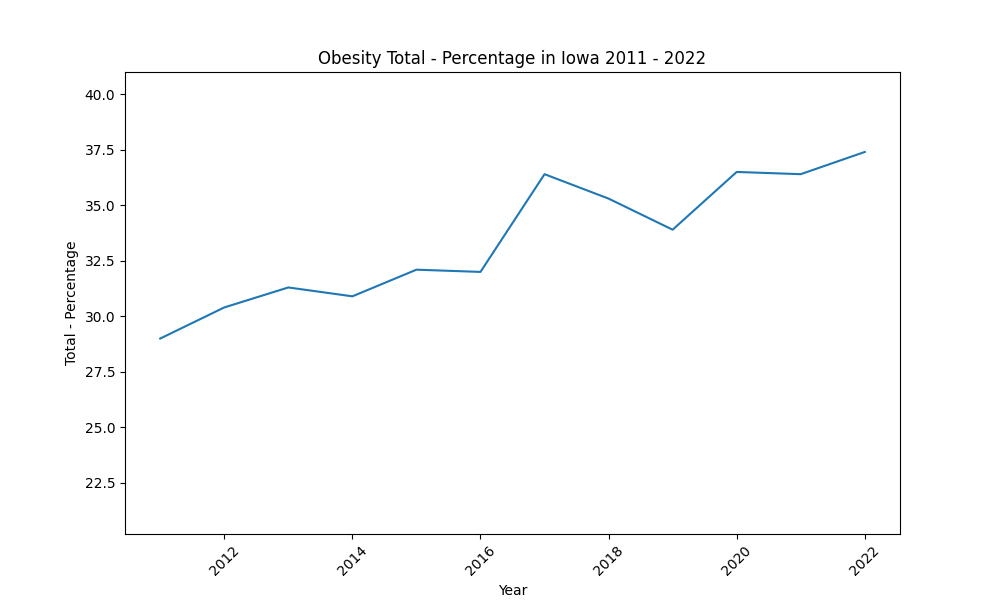
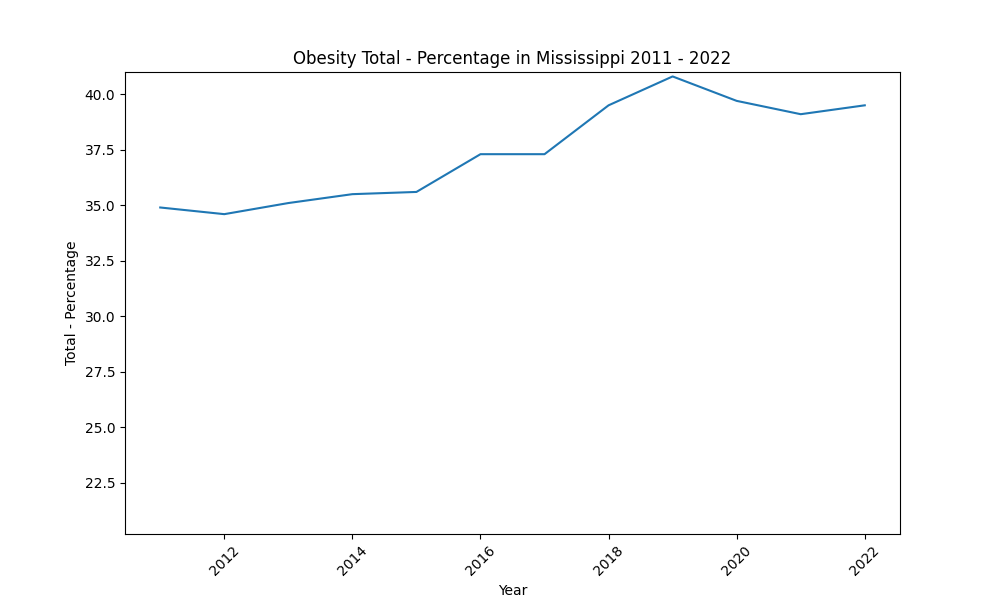
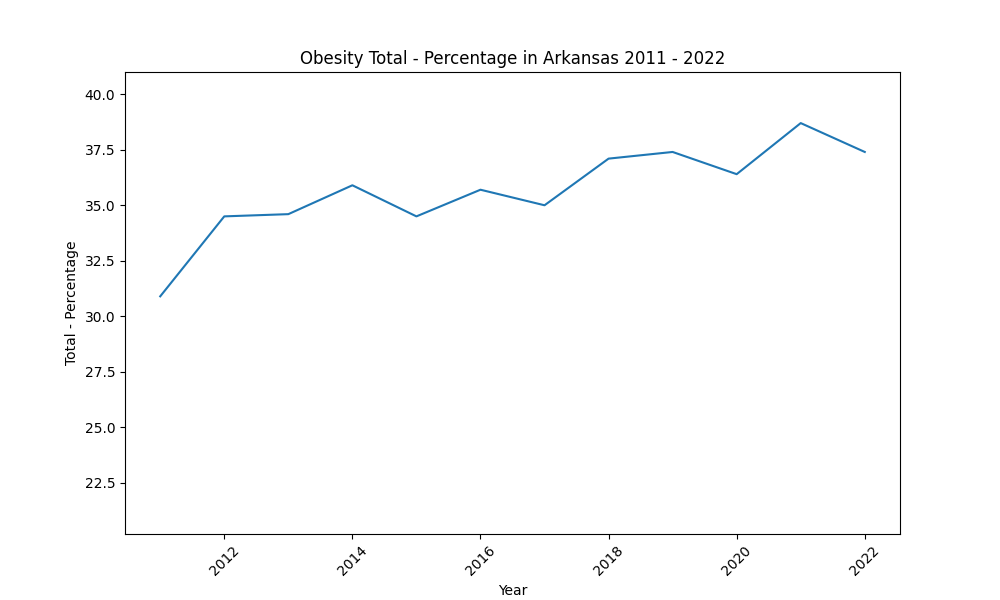
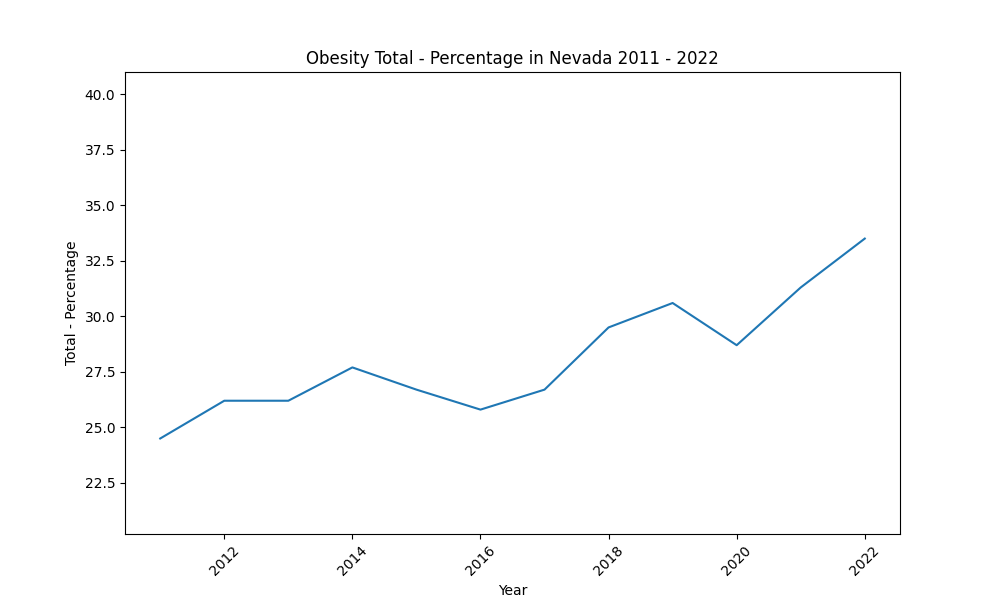
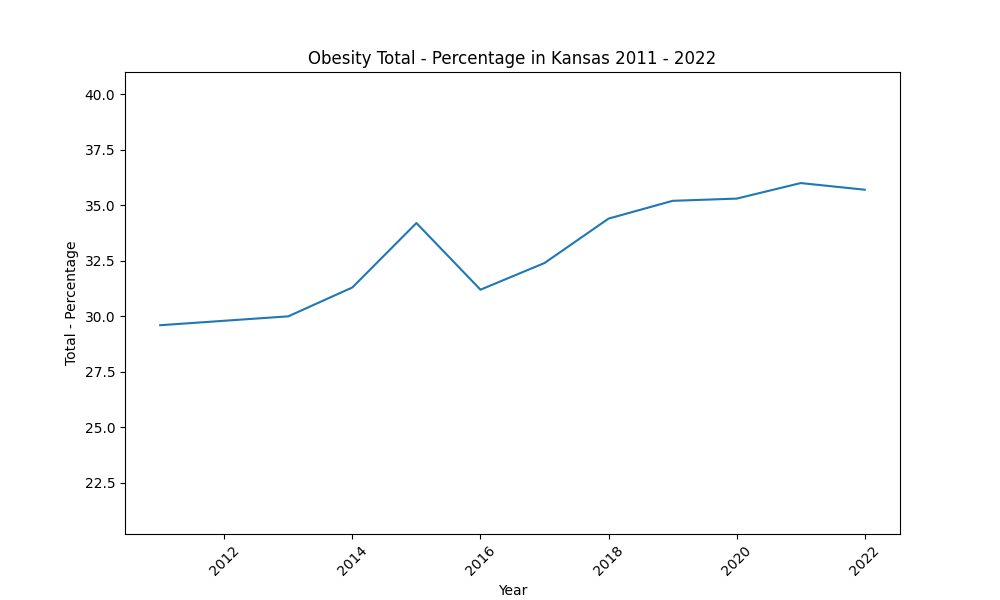
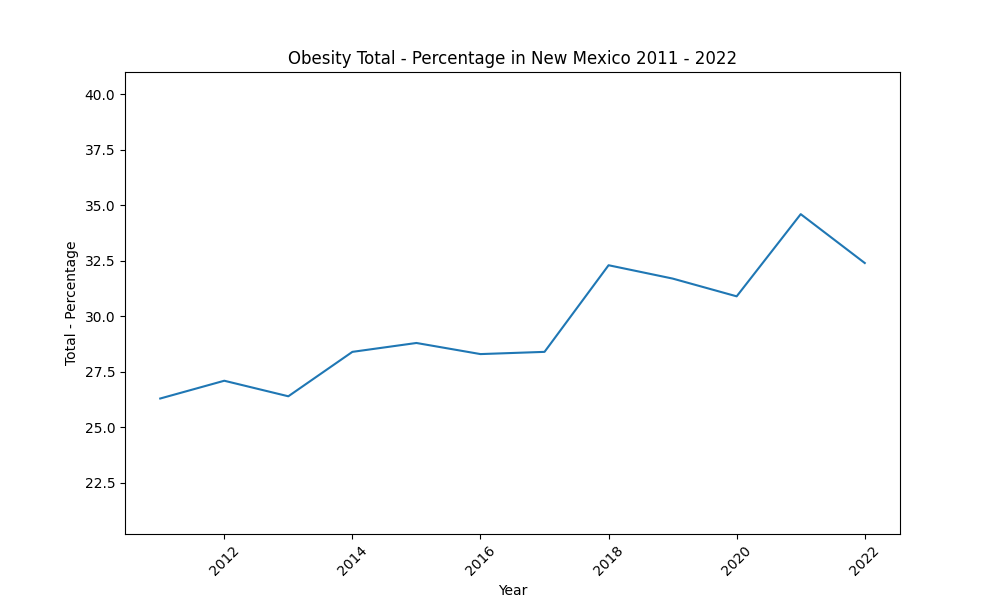
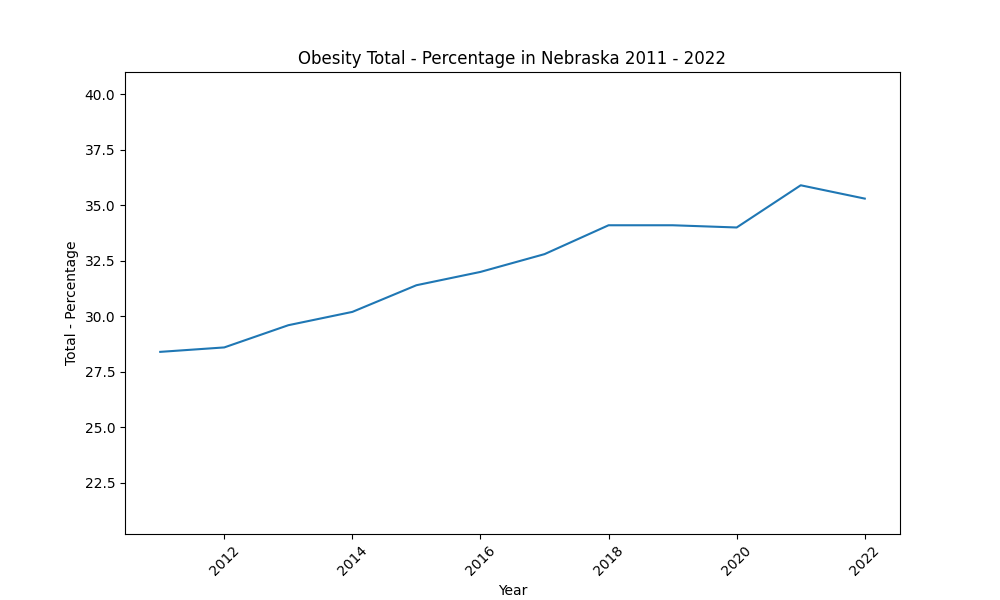
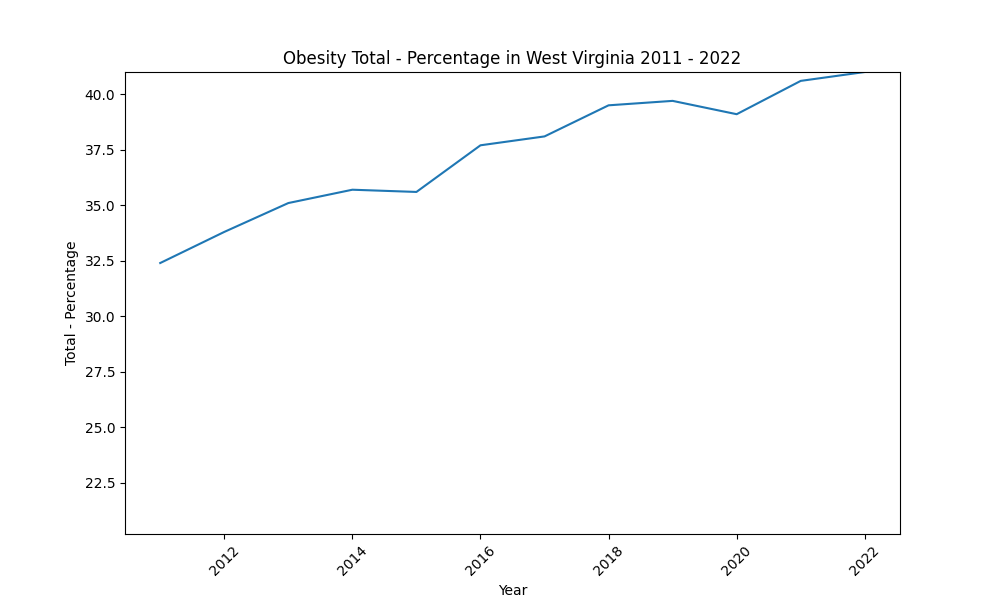
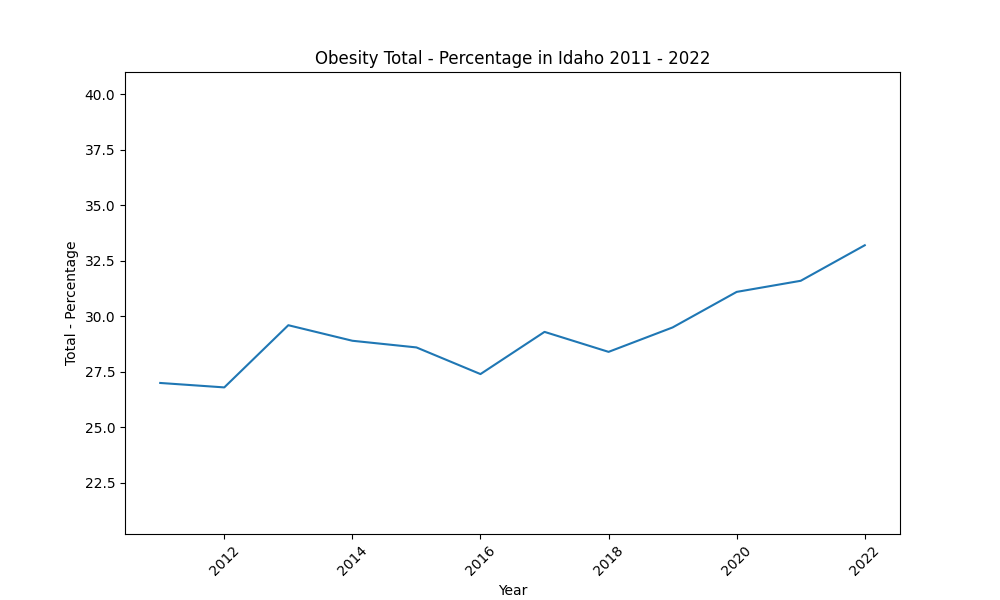
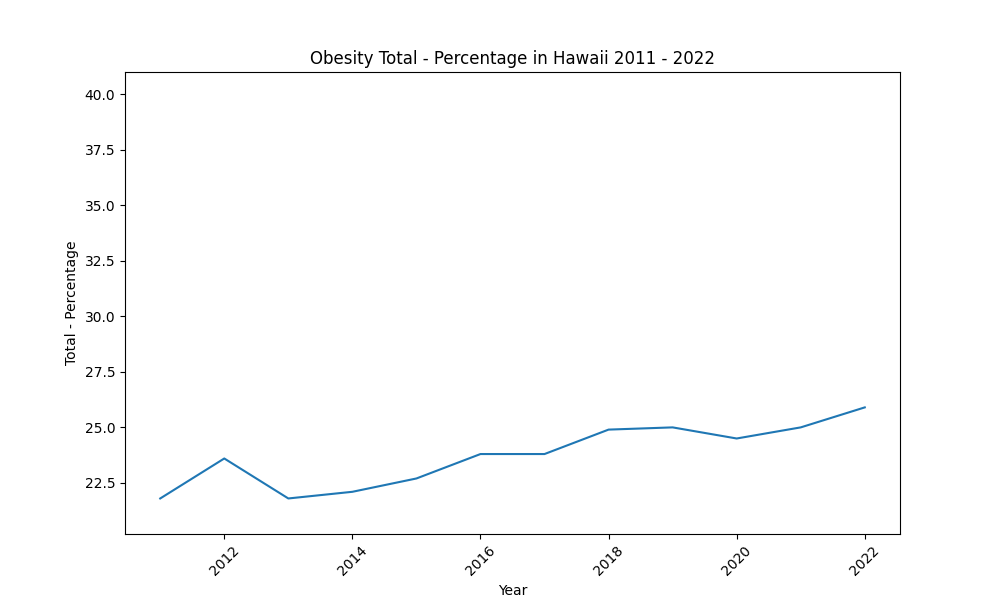
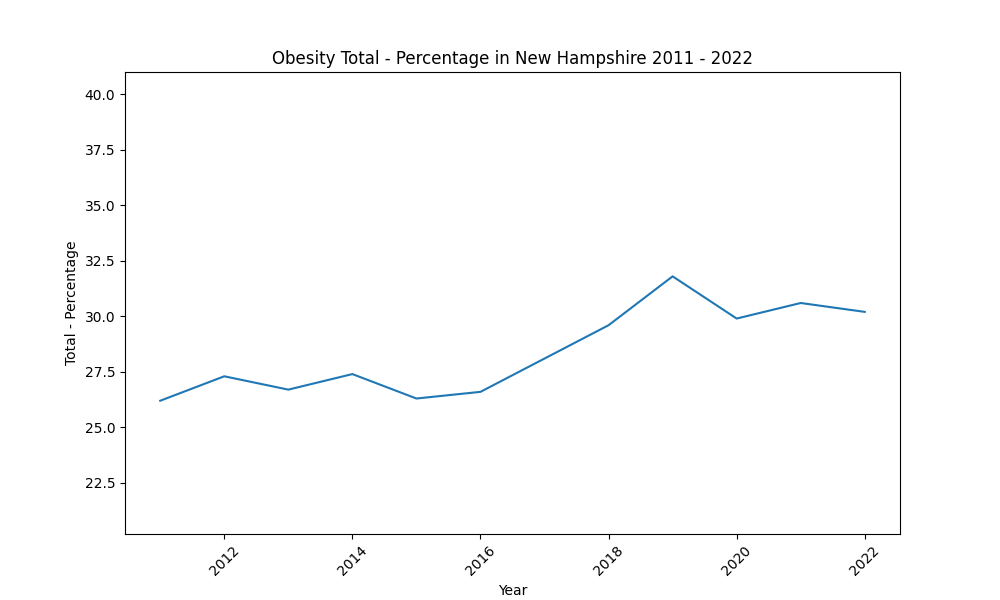
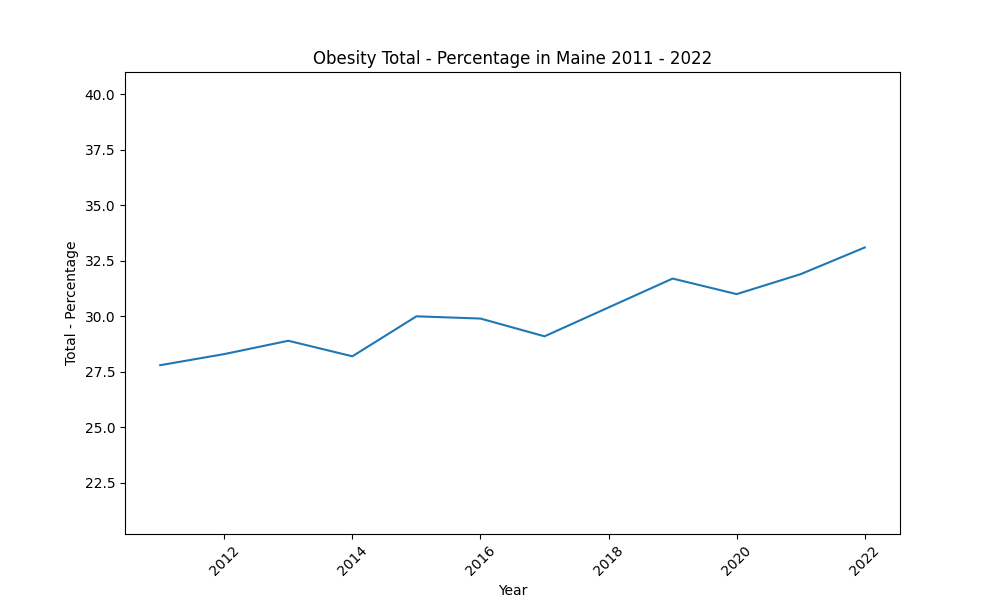
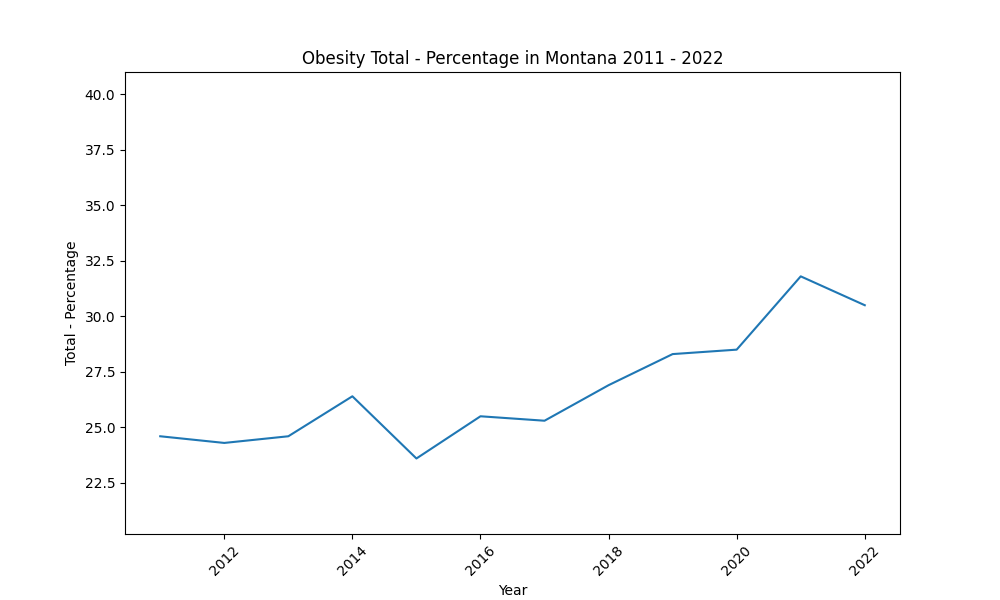
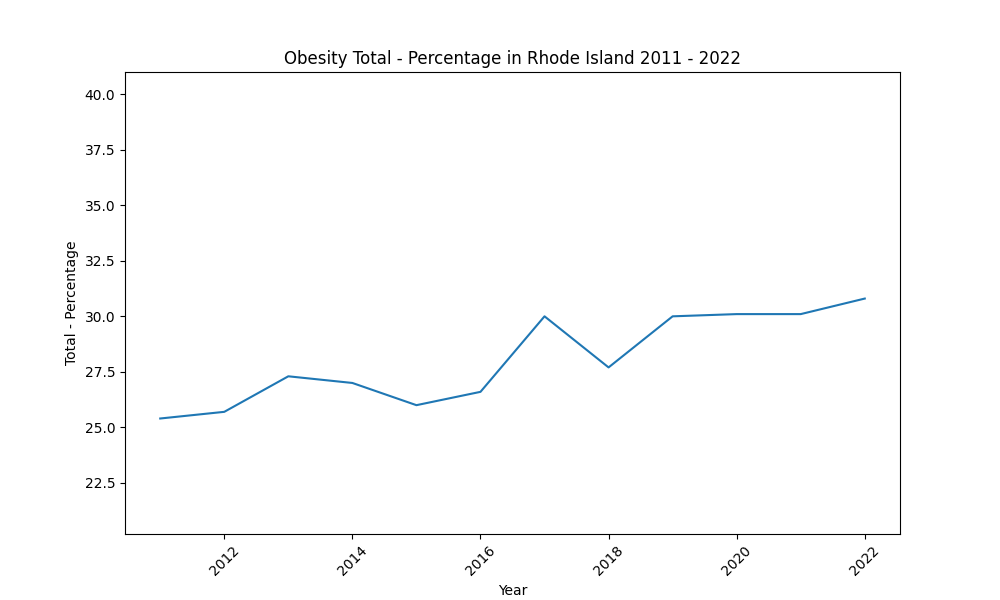
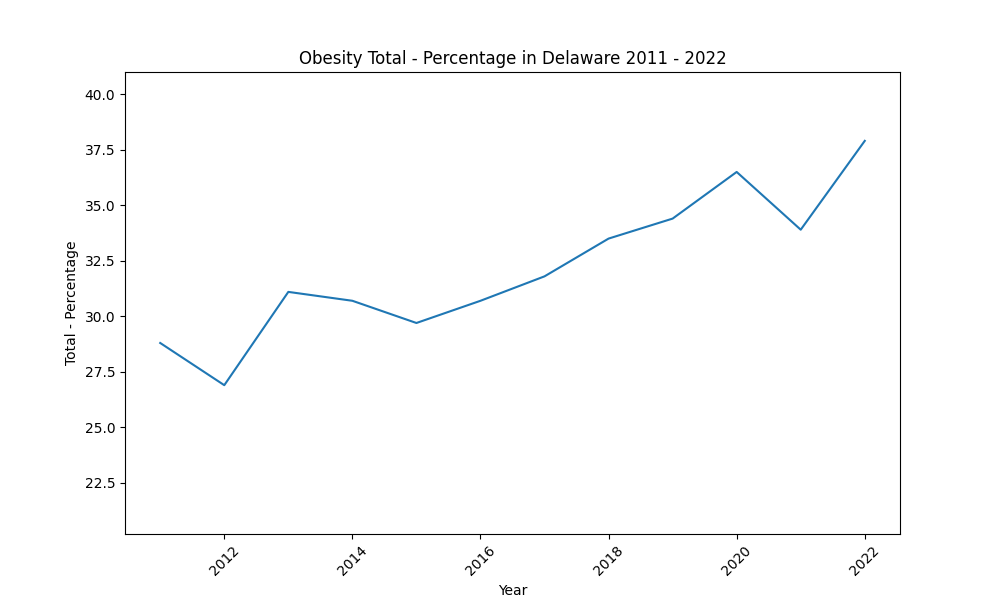
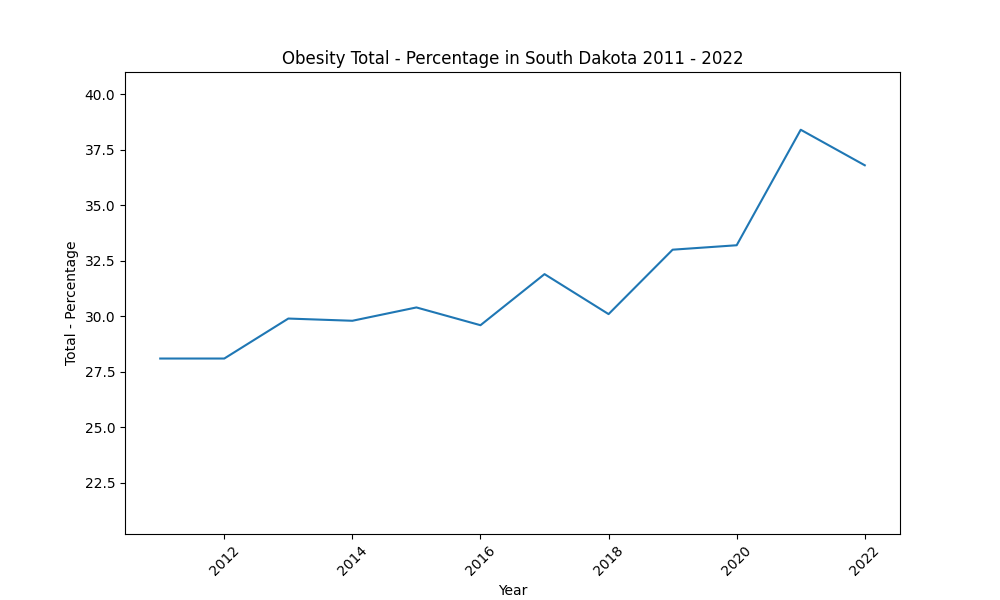
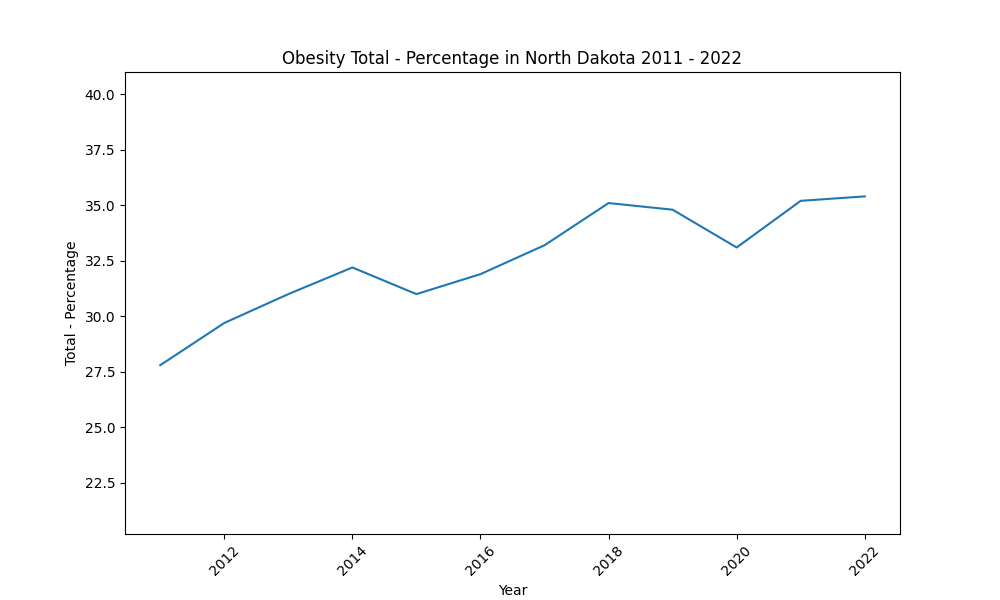
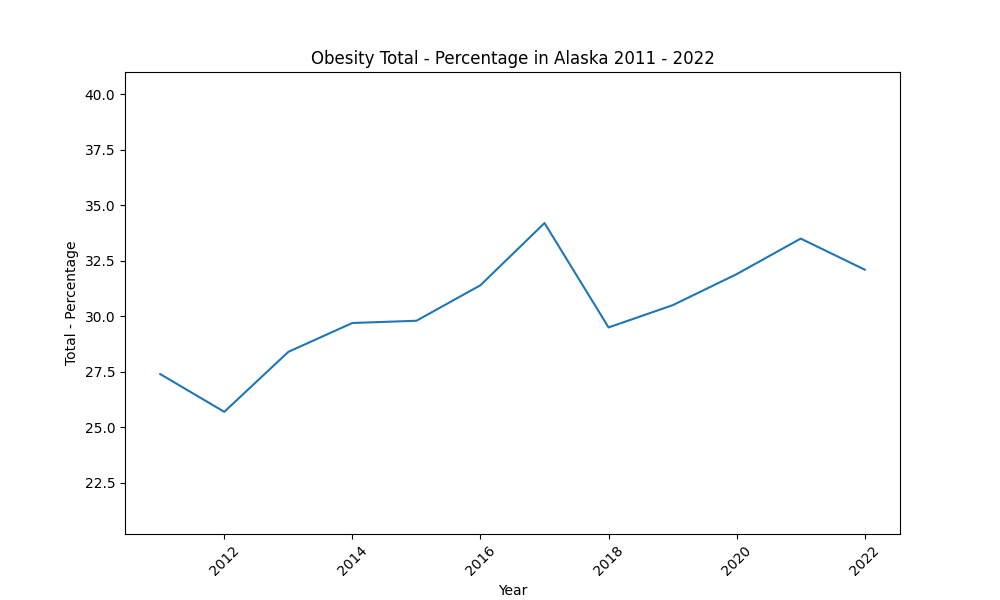
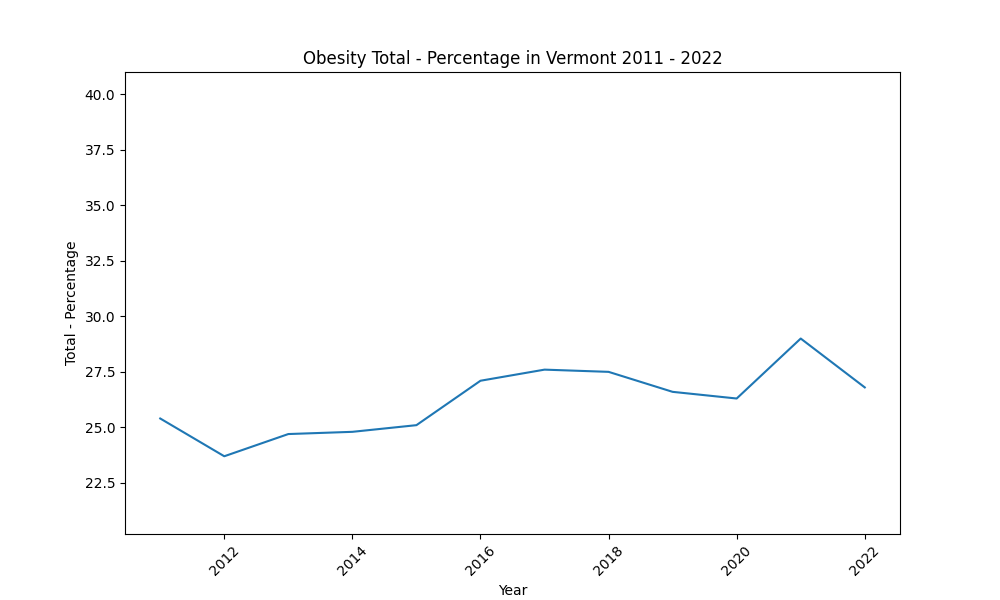
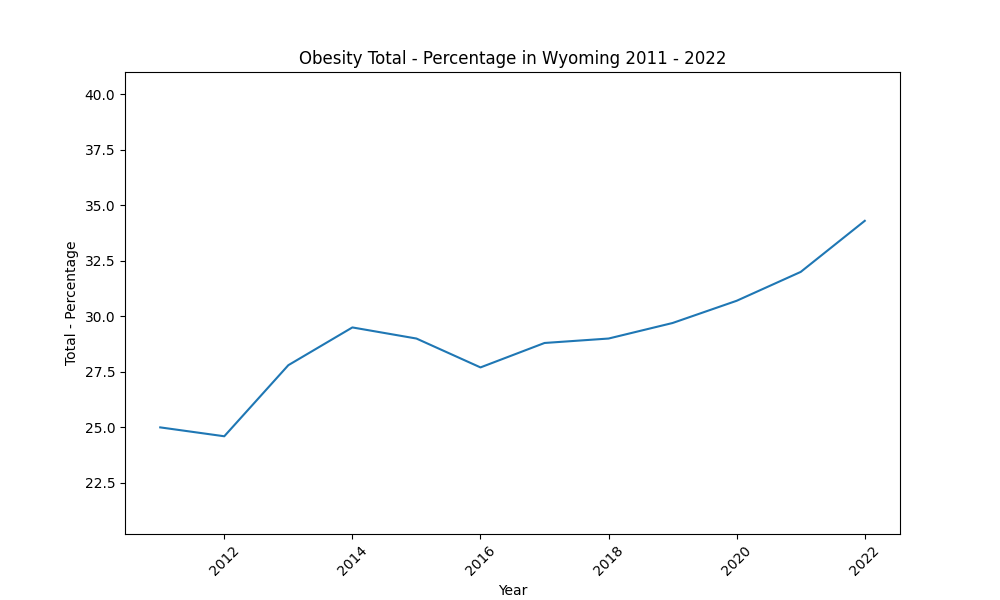
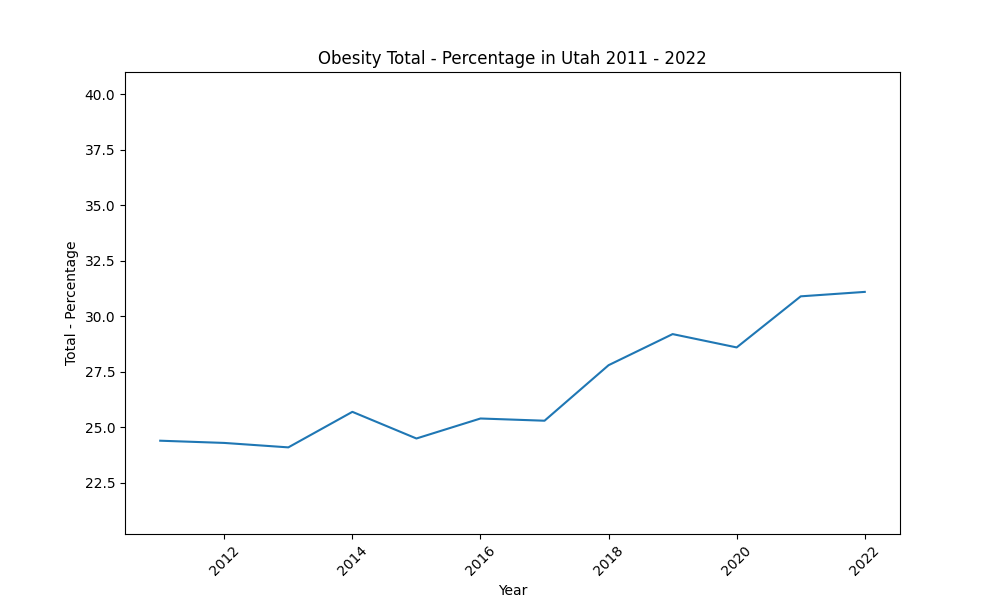

In [135]:
import folium
from folium import Popup
from IPython.display import display, HTML
import os
from PIL import Image
import base64


# Import the state coordinates from the config file
from config import state_coords

graph_folder = 'state_obesity_graphs'

def img_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

def display_state_graph(state_name):
    graph_path = os.path.join(graph_folder, f'{state_name}_obesity_graph.png')
    if os.path.exists(graph_path):
        img_data = img_to_base64(graph_path)
        display(HTML(f'<img src="data:image/png;base64,{img_data}" style="width:600px;height:400px;">'))
    else:
        print(f"Graph for {state_name} not found!")

state_map = folium.Map(location=[39.0900, -95.7100], zoom_start=4)

for state, coords in state_coords.items():
    graph_path = os.path.join(graph_folder, f"{state.replace(' ', '_')}_obesity_graph.png")
    
    if os.path.exists(graph_path):
        img_data = img_to_base64(graph_path)
        html = f"<b>{state}</b><br><img src='data:image/png;base64,{img_data}' style='width:500px;height:400px;'>"
        popup = Popup(html, max_width=900)
    else:
        popup = Popup(f"<b>{state}</b>")

    folium.Marker(location=coords, popup=popup).add_to(state_map)

state_map


In [117]:
print(f"food_security_data column count: {len(food_security_data.columns)}")

food_security_data column count: 31


In [118]:
print(len(food_security_data))

650810


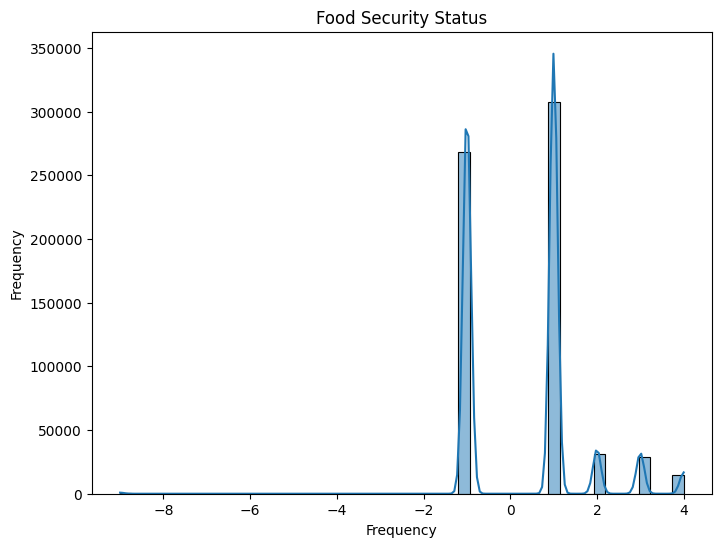

In [119]:
plt.figure(figsize=(8, 6))
sns.histplot(food_security_data['Food Security Status'], bins=50, kde=True)
plt.title('Food Security Status')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

In [120]:
# Any number below zero means that they refused to respond
# Drop the data for food security status that has a number below zero
food_security_data = food_security_data[food_security_data['Food Security Status'] > 0]

In [ ]:
# Plot the histogram again

plt.figure(figsize=(8, 6))
sns.histplot(food_security_data['Food Security Status'], bins=50, kde=True)
plt.title('Food Security Status')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()